# Problem Set 6 - Group 18

### Imports

In [10]:
import numpy as np 
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy.optimize import minimize

import warnings
warnings.filterwarnings('ignore')

## Problem 1

### Functions

In [2]:
#Define Functions 
def f1(x):
    return np.exp(2*x + 2)

def f2(x):
    f2=[]
    for i in range(0, len(x)):
        e_1 = 4*(x[i]) - 4/5 
        f2_i= np.minimum(np.maximum(-1 , e_1 ) ,1)
        f2.append(f2_i)
    return f2

def f3(x):
    return -2*(x**(-0.5))

def f4(x):
    return 1/(1+x**2)

### Approximation Methods

#### Chebyshev Polynomials

In [3]:
# Chebyshev Polynomials
def approx_cheby(fun, n, x_min, x_max, size, args=None):
    # Assign grid space:
    x_grid = np.linspace(x_min,x_max,size)

    # Find chebychev polynomial roots
        # Create empty array
    r_k = np.zeros(n)

        # Compute chebyshev nodes
    for i in range(n):
        r_k[i] = -np.cos((2*(i+1)-1)/(2*n)*np.pi)

    # Create Vandermonde Matrix:
    V = np.zeros((n,n))

    V[:, 0] = np.ones(n).T

    V[:, 1] = r_k.T

    for i in range(1,n-1):
        V[:, i+1] = 2 * r_k * V[:, i] - V[:, i-1]

    # Transform chebychev roots to match domain of function [x_min,x_max]:
    x_k = x_min + (r_k + 1)*(x_max - x_min)/2

    # Create vector of evaluated points
    if args:
        y_k = fun(x_k, *args)
    else:
        y_k = fun(x_k)

    # Find set of coefficients, alpha, that solve the linear system
    alpha = np.linalg.solve(V,y_k)

    # Transform approximation interval to interval [-1,1] 
    z_grid = (2*(x_grid - x_min)/(x_max - x_min)) - 1

    # Create a chebyshev polynomial matrix
    T = np.zeros((len(z_grid),n))

    T[:, 0] = np.ones((len(z_grid),1)).T

    T[:, 1] = z_grid.T

    for i in range(1,n-1):
        T[:, i+1] = 2 * z_grid * T[:, i] - T[:, i-1]

    # Apply (/"Transform"?) T using solved set of coefficients to get predicted values 
    predic = T@alpha

    return predic

#### Lagrange Polynomials

In [4]:
# Lagrange Polynomials
def approx_lagrange(fun, n, x_min, x_max, size, args=None):

    # Assign grid space:
    x_grid = np.linspace(x_min,x_max,size)
    
    # Find lagrange roots
    x_k = np.linspace(x_min, x_max, n)
    
    # Create Vandermonde Matrix:
    V = np.zeros((len(x_k),n)) 
    
    # Construct polynomials
    for i in range(n):      # For each column
        V[:, i] = x_k**i     # Construct polynomial

    # Create vector of evaluated points 
    if args:
        y_k = fun(x_k, *args)
    else:
        y_k = fun(x_k)
        
    # Find set of coefficients, alpha, that solve the linear system
    alpha = np.linalg.solve(V,y_k)

    # Create the x_grid matrix
    P = np.zeros((len(x_grid),n))

    # Construct polynomials
    for i in range(n):
        P[:, i] = x_grid**i

    # Apply (/"Transform"?) T using solved set of coefficients to get predicted values 
    predic = P@alpha
    return predic

#### Linear Interpolation

In [5]:
# Linear Interpolation
def approx_linear(fun, n, x_min, x_max, size, args=None):
    
    # Assign grid space
    x_grid = np.linspace(x_min,x_max,size)

    # Create nodes
    x_n = np.linspace(x_min,x_max,n)

    # Evaluate function at nodes
    if args:
        y_n = fun(x_n, *args)
    else:
        y_n = fun(x_n)
        
    # Create interpolating 'function'
    f_interp = interpolate.interp1d(x_n, y_n, kind='linear')

    # Return interpolation along x_grid
    return f_interp(x_grid)

#### Cubic Splines

In [6]:
# Cubic Splines
def approx_cubic(fun, n, x_min, x_max, size, args=None):
    
    # Assign grid space
    x_grid = np.linspace(x_min,x_max,size)

    # Create nodes
    x_n = np.linspace(x_min,x_max,n)

    # Evaluate function at nodes
    if args:
        y_n = fun(x_n, *args)
    else:
        y_n = fun(x_n)
        
    # Create interpolating 'function'
    f_interp = interpolate.CubicSpline(x_n, y_n)

    # Return interpolation along x_grid
    return f_interp(x_grid)

### Part a

In [7]:
## Set up:
# Define node sizes
N = [5, 10, 20, 50, 100]
# Create iterable for approximation methods
methods = {approx_cheby:"Chebyshev Polynomials", approx_lagrange:"Lagrange Polynomials", approx_linear:"Linear Interpolation", approx_cubic:"Cubic Splines"}

#### Function 1

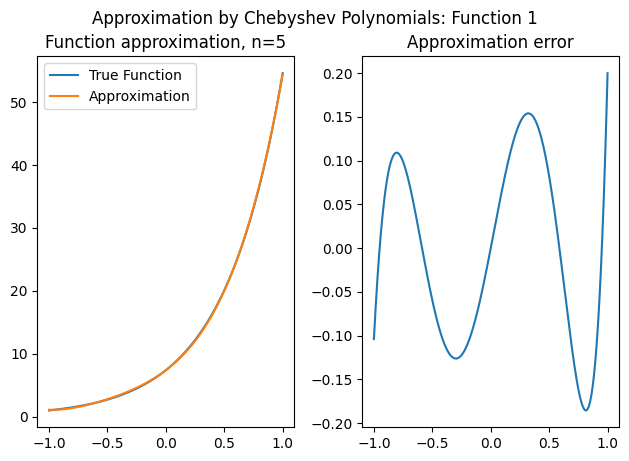

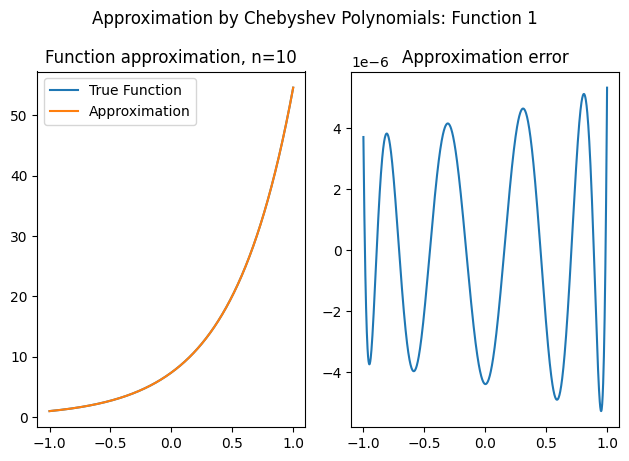

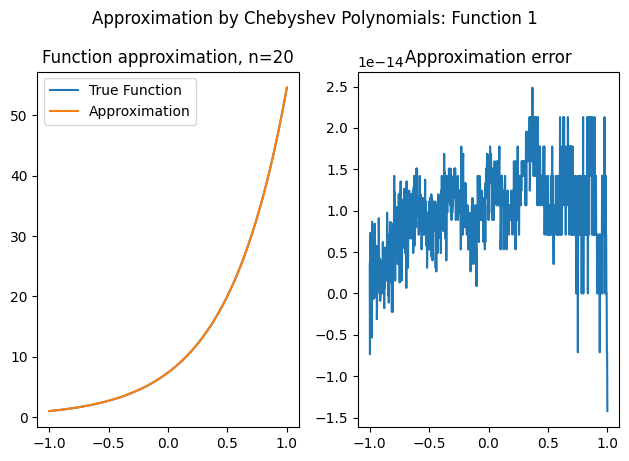

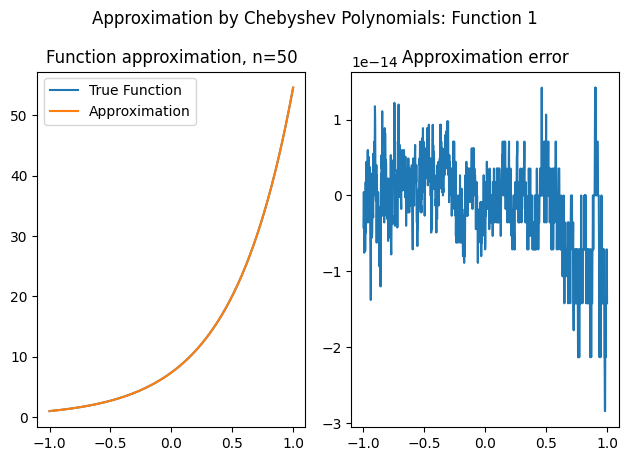

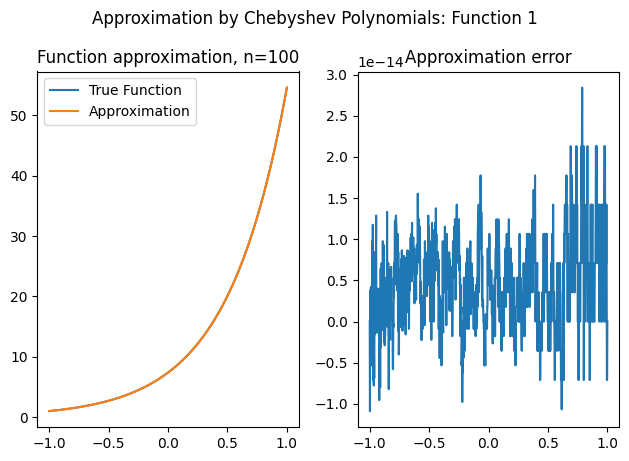

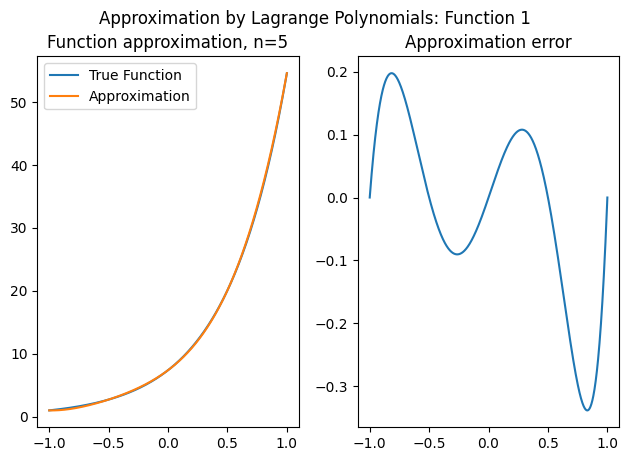

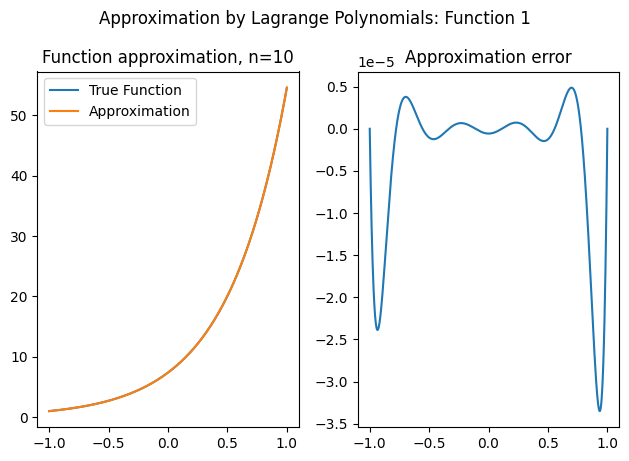

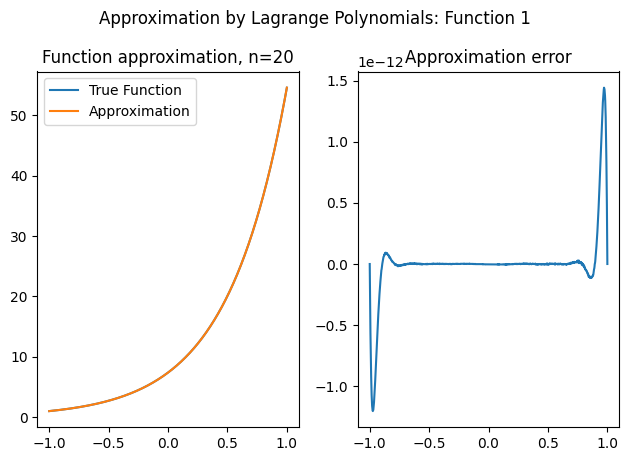

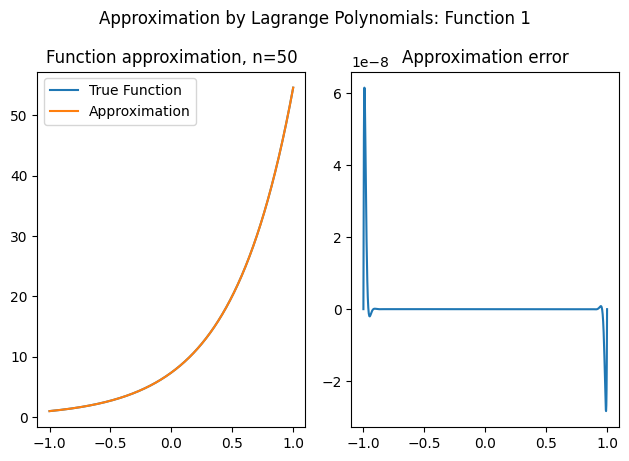

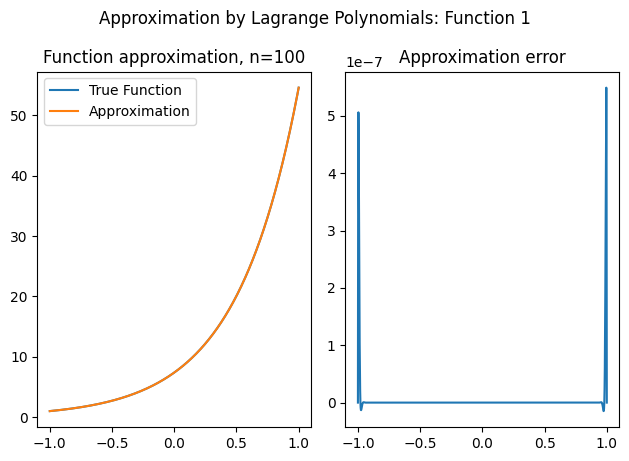

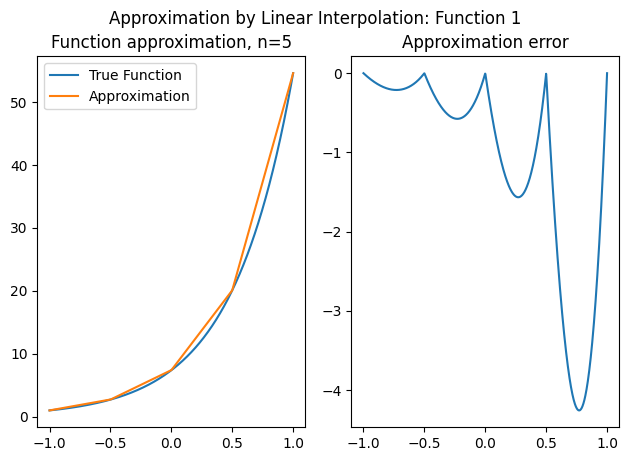

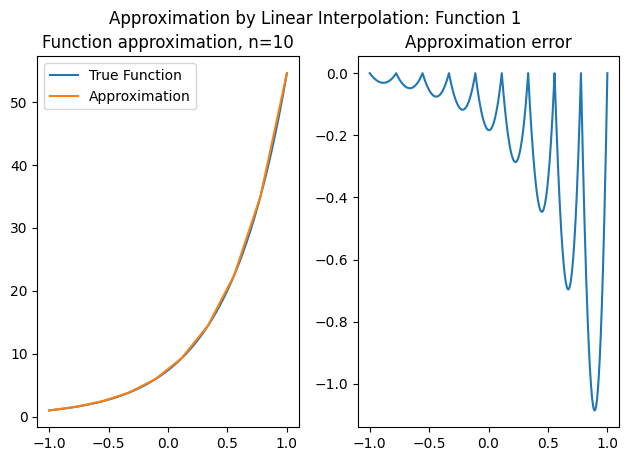

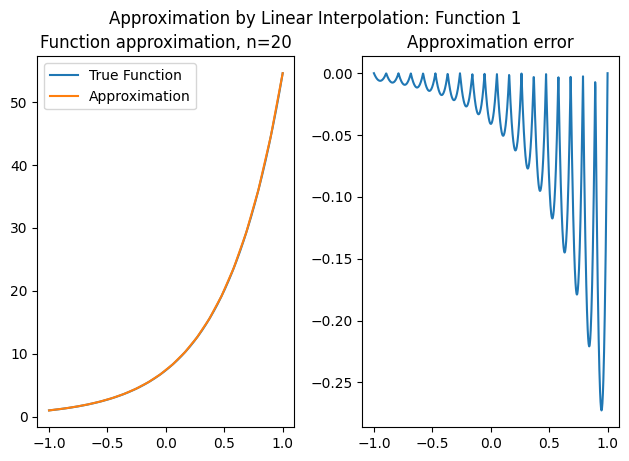

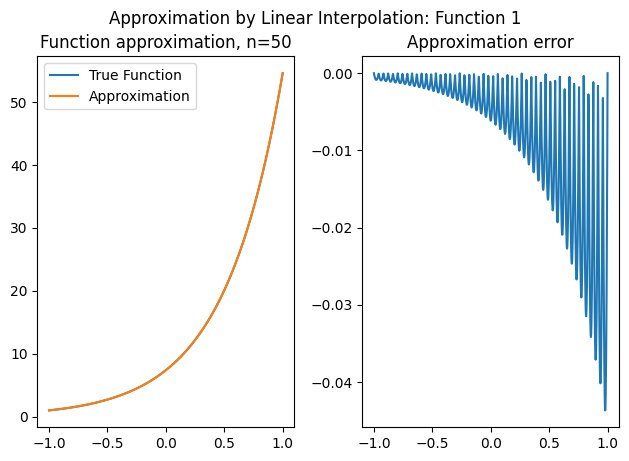

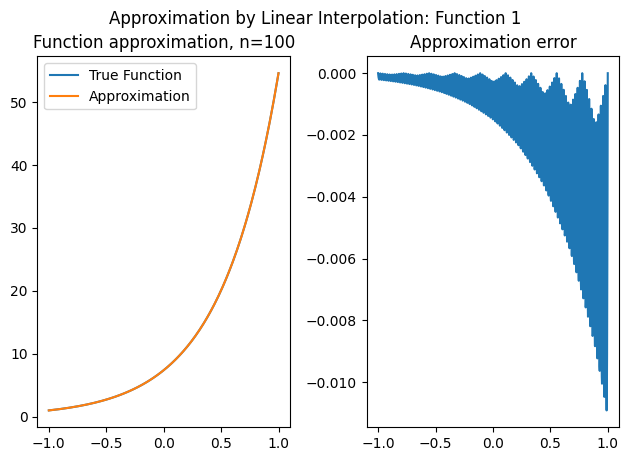

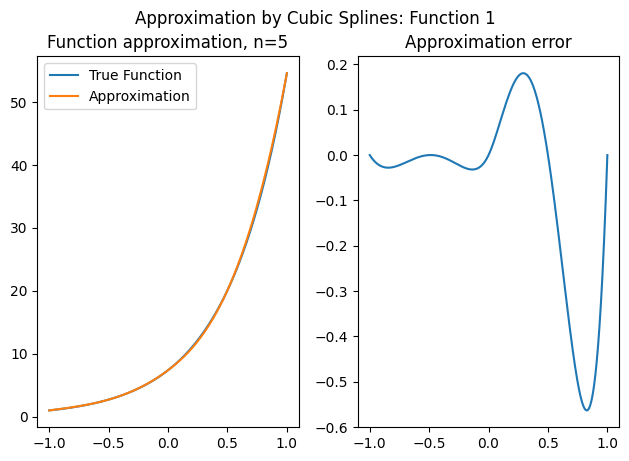

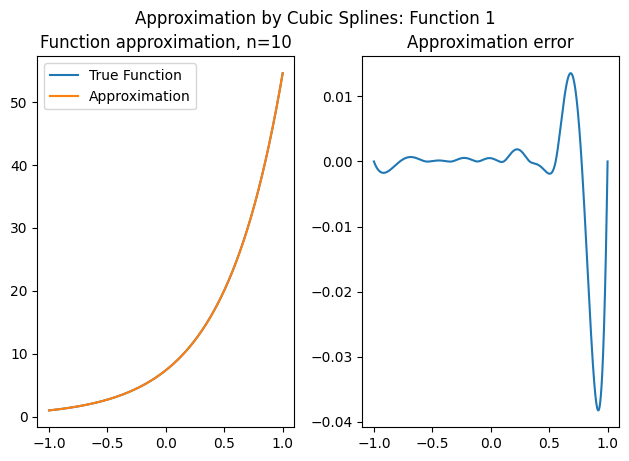

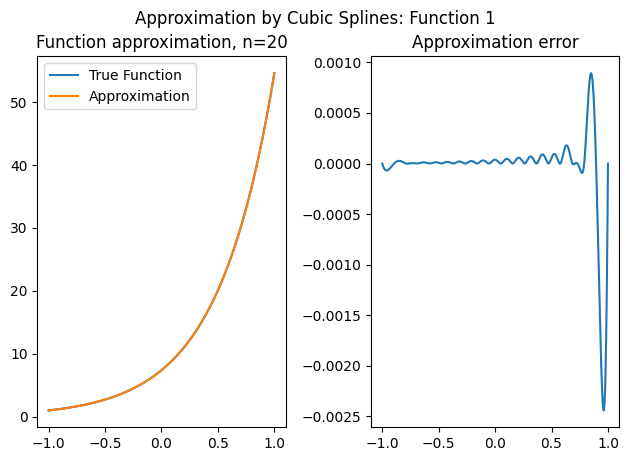

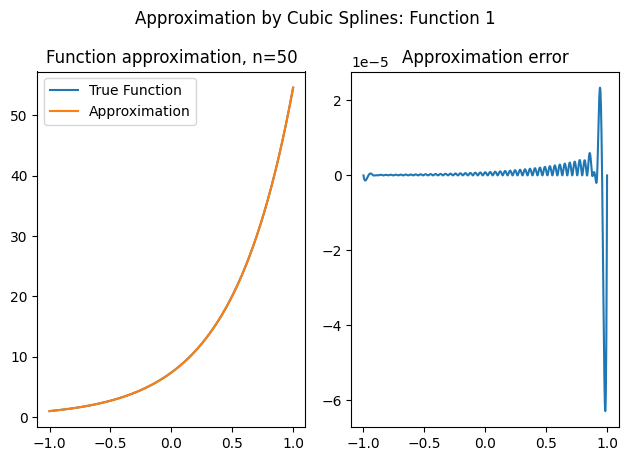

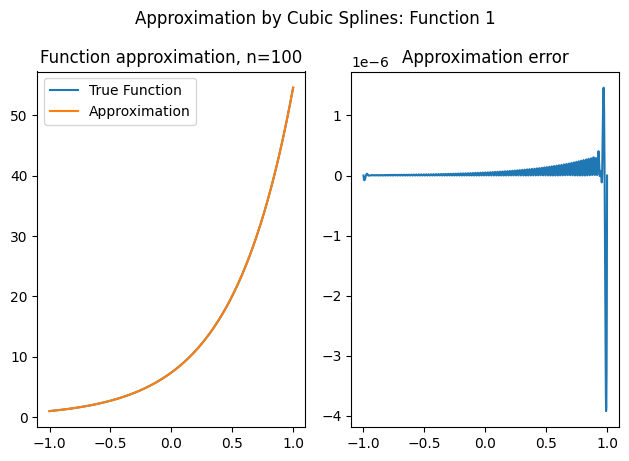

In [8]:
## FUNCTION 1 ## 

# Define interval
x_min = -1
x_max = 1
# Define grid size
x_grid = np.linspace(x_min,x_max,1000)
# Select function
fun = f1
# Evaluate true function
true = fun(x_grid)


for method in methods:
    for n in N:
        predic = method(fun,n,x_min,x_max,1000)

        fig, ax = plt.subplots(1,2)
        fig.suptitle(f"Approximation by {methods[method]}: Function 1", y=0.95)
        
        ax[0].set_title(f"Function approximation, n={n}")
        ax[0].plot(x_grid, true, label="True Function")
        ax[0].plot(x_grid, predic, label="Approximation")
        ax[0].legend()        

        ax[1].set_title("Approximation error")
        ax[1].plot(x_grid,true - predic)

        plt.tight_layout()
        plt.show()
        print()

#### Function 2

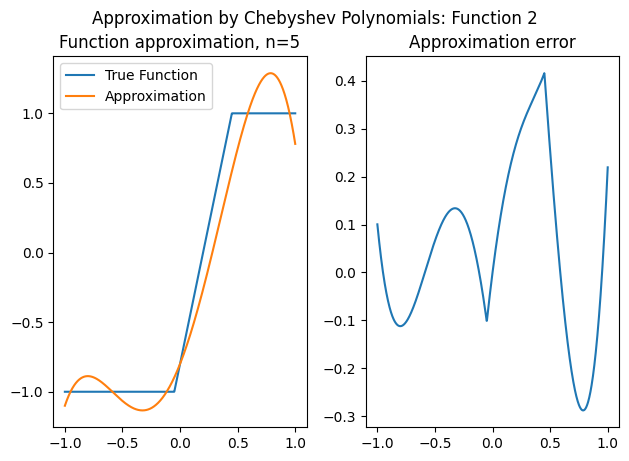

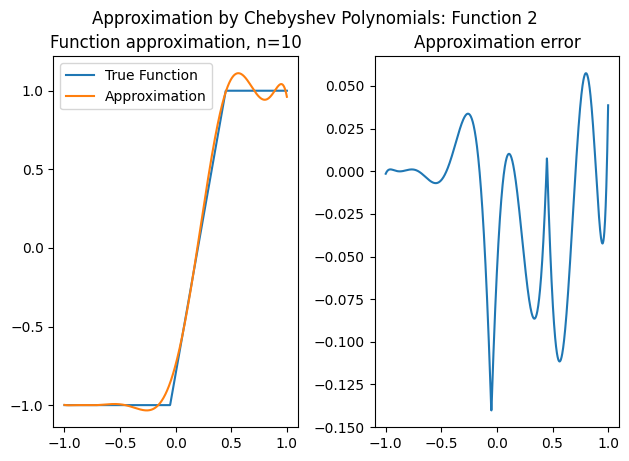

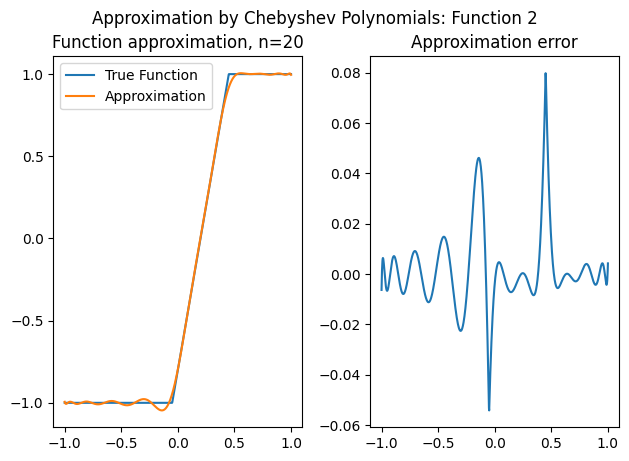

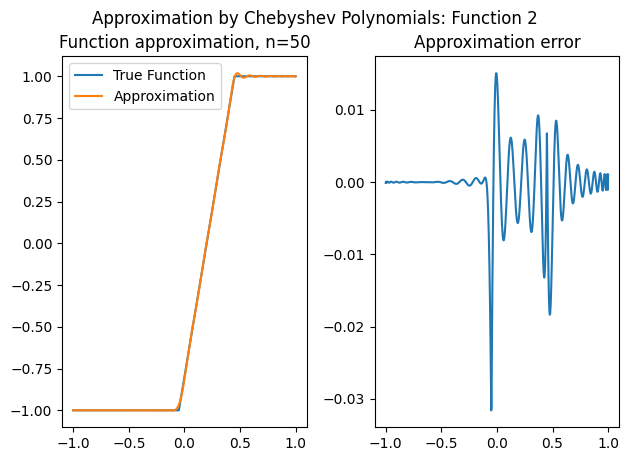

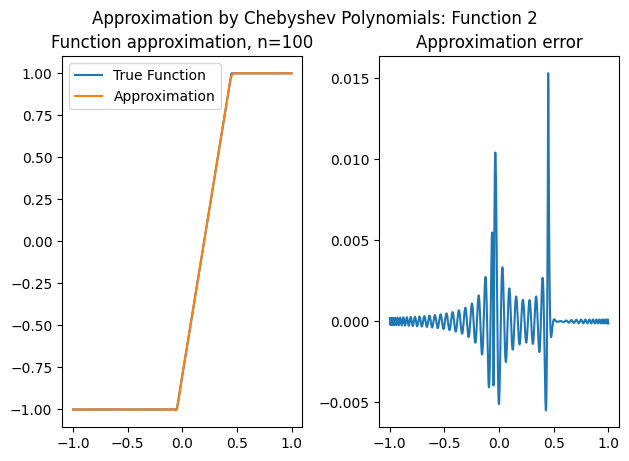

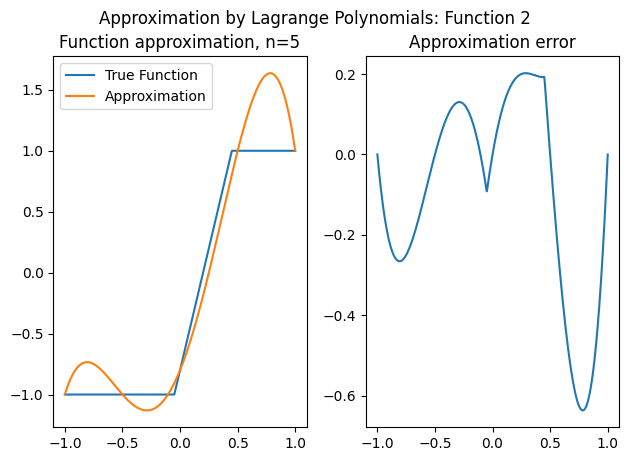

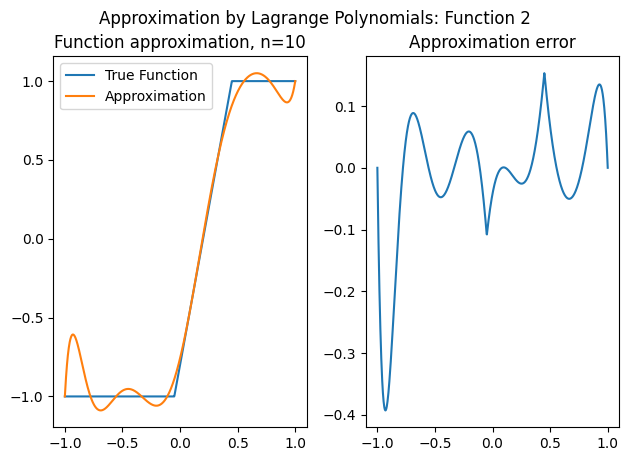

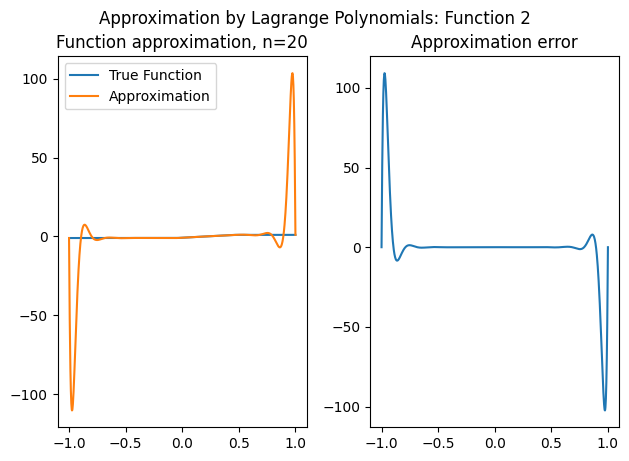

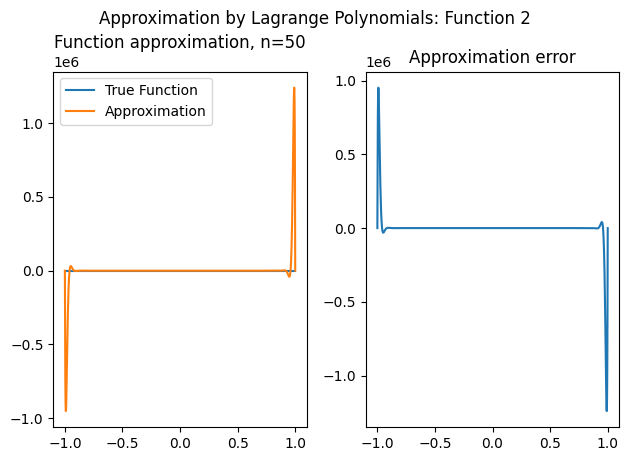

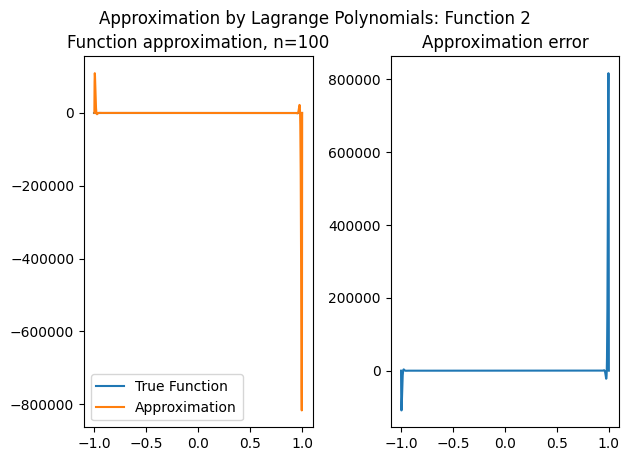

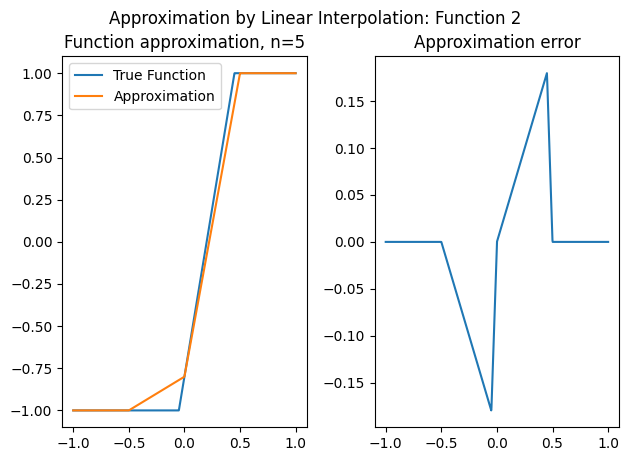

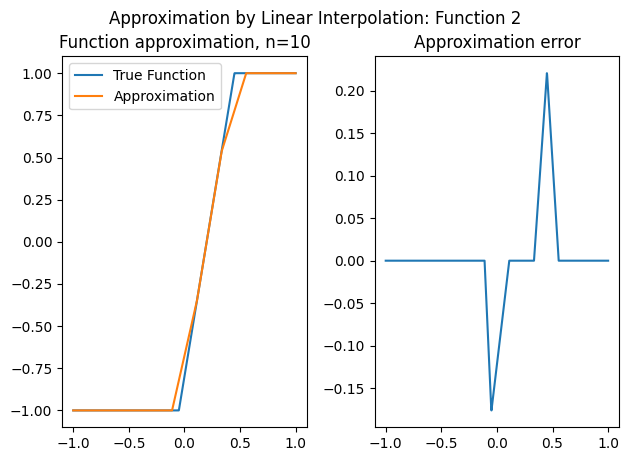

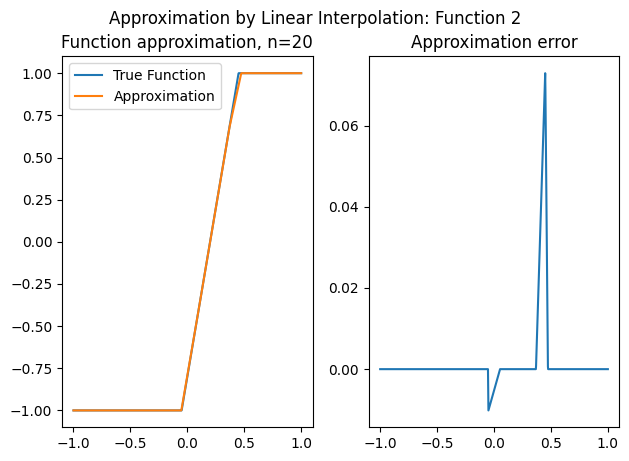

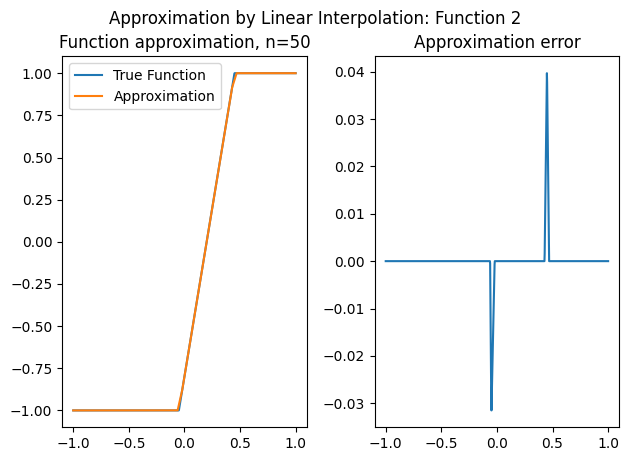

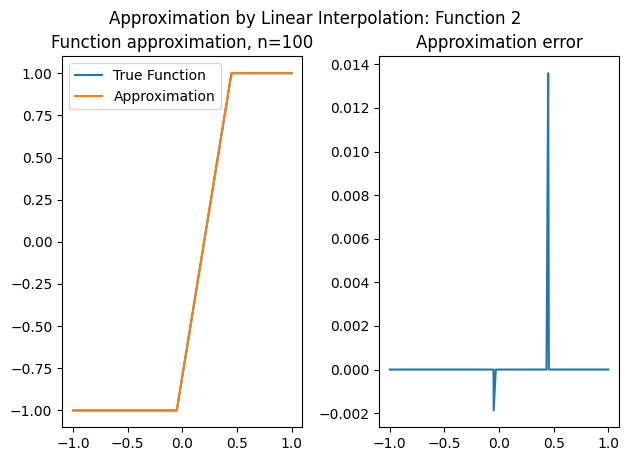

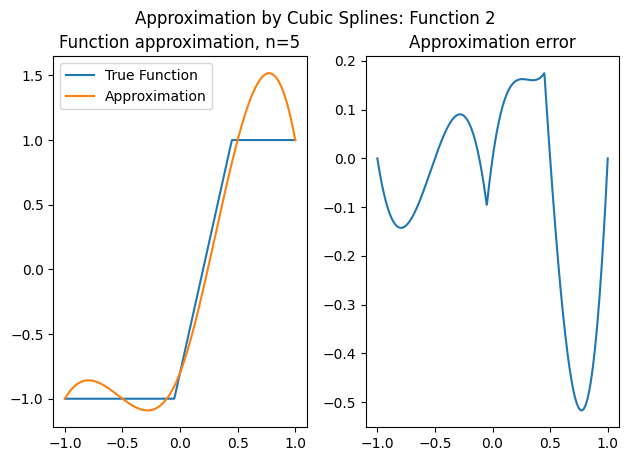

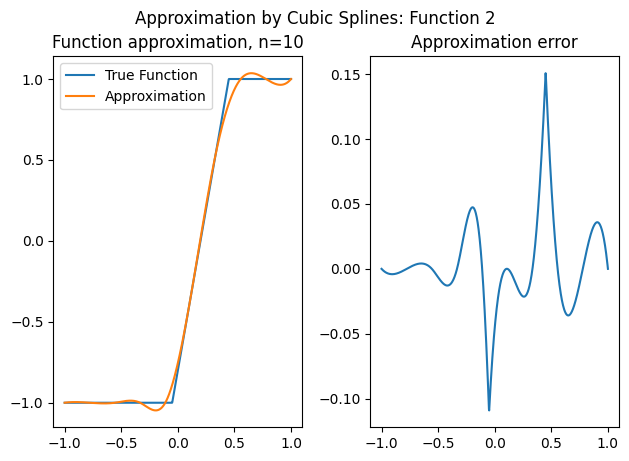

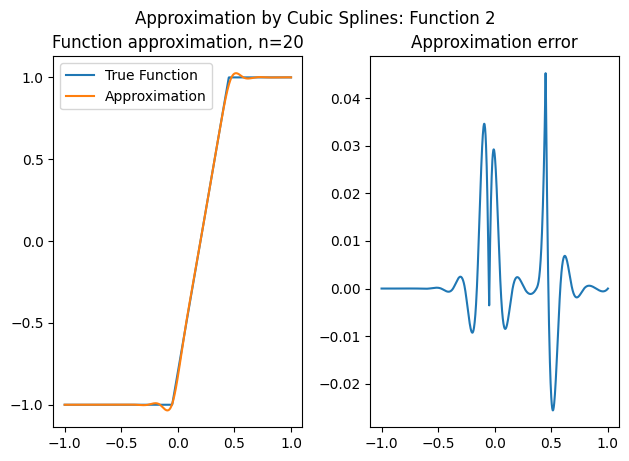

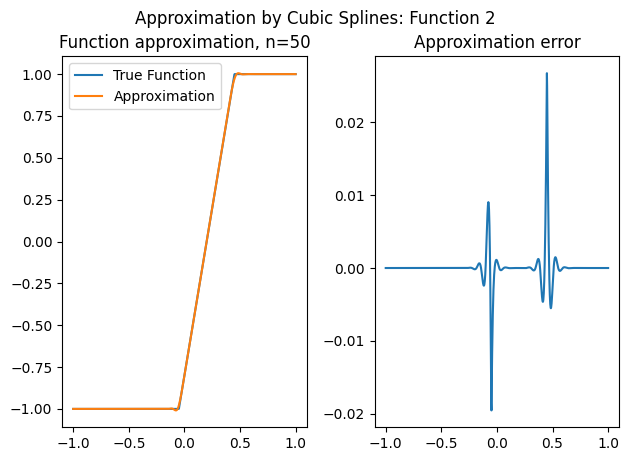

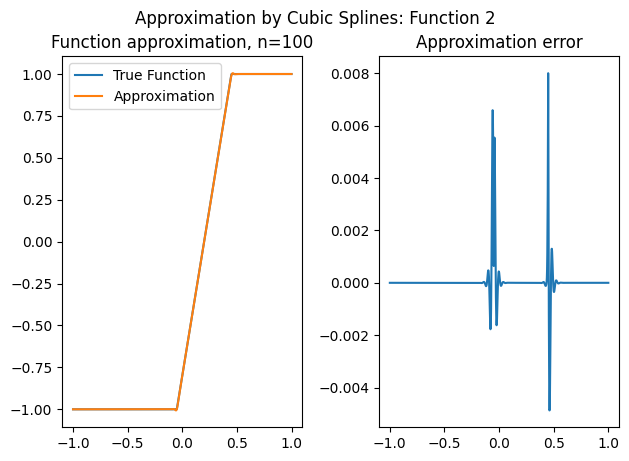

In [9]:
## FUNCTION 2 ## 

# Define interval
x_min = -1
x_max = 1
# Define grid size
x_grid = np.linspace(x_min,x_max,1000)
# Select function
fun = f2
# Evaluate true function
true = fun(x_grid)


for method in methods:
    for n in N:
        predic = method(fun,n,x_min,x_max,1000)

        fig, ax = plt.subplots(1,2)
        fig.suptitle(f"Approximation by {methods[method]}: Function 2", y=0.95)
        
        ax[0].set_title(f"Function approximation, n={n}")
        ax[0].plot(x_grid, true, label="True Function")
        ax[0].plot(x_grid, predic, label="Approximation")
        ax[0].legend()

        ax[1].set_title("Approximation error")
        ax[1].plot(x_grid,true - predic)

        plt.tight_layout()
        plt.show()
        print()

#### Function 3

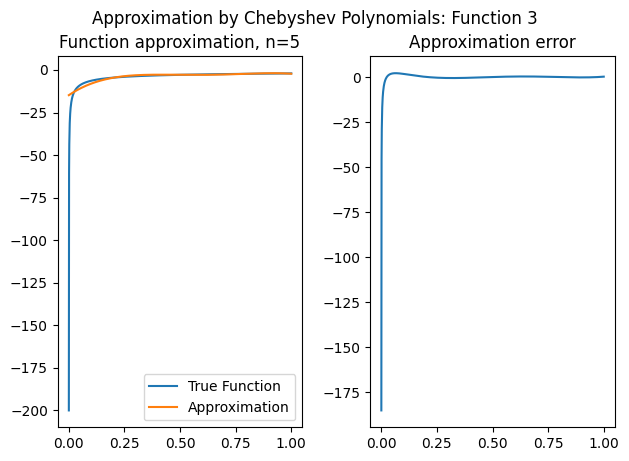

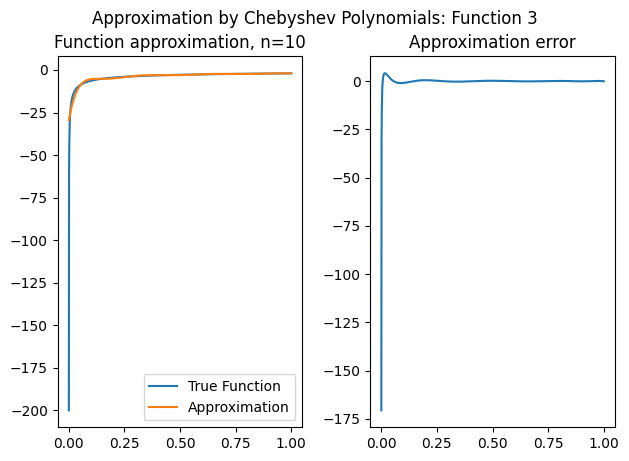

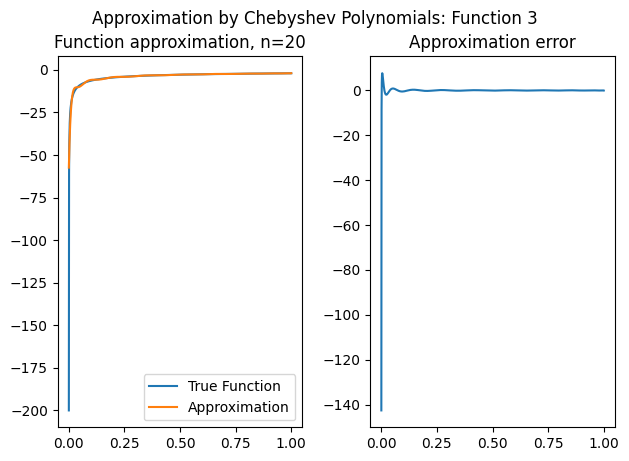

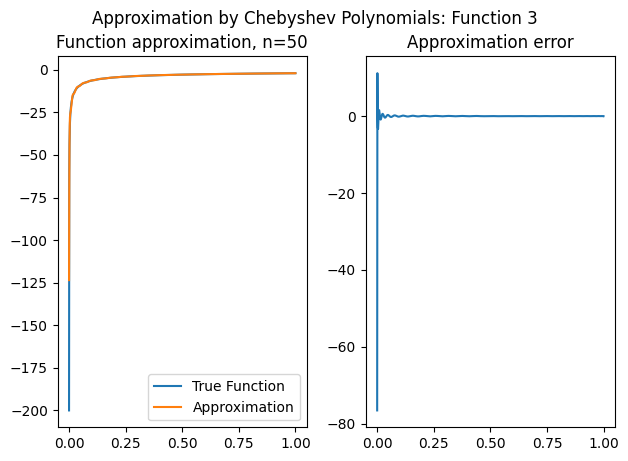

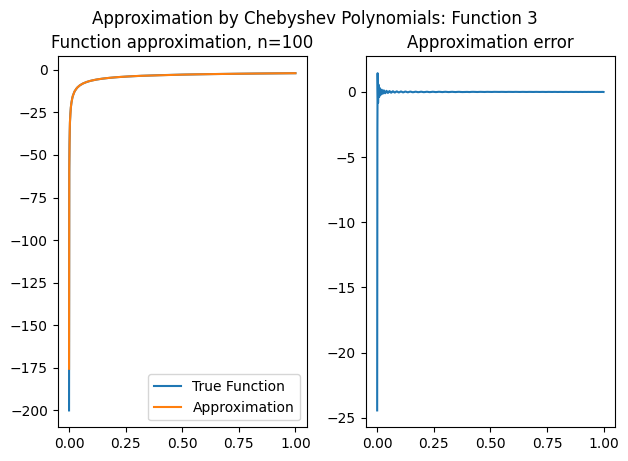

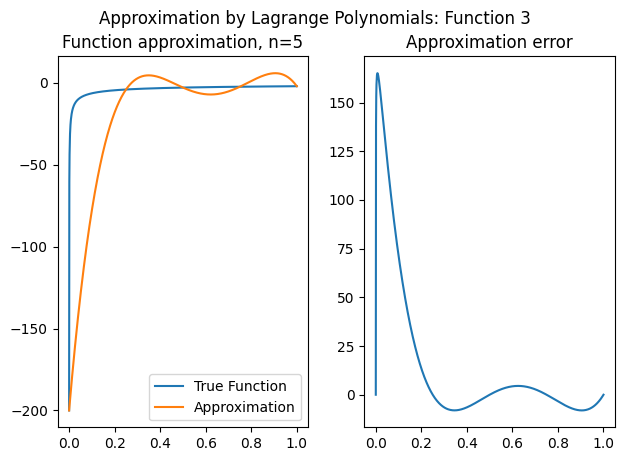

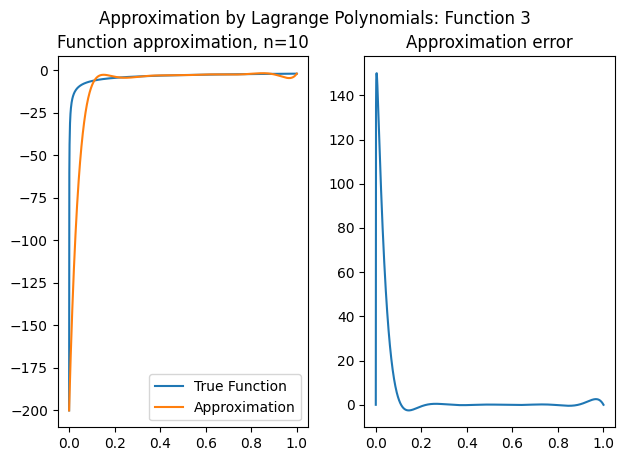

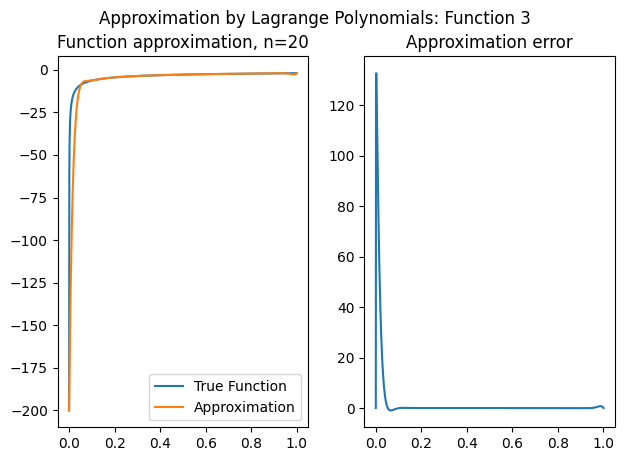

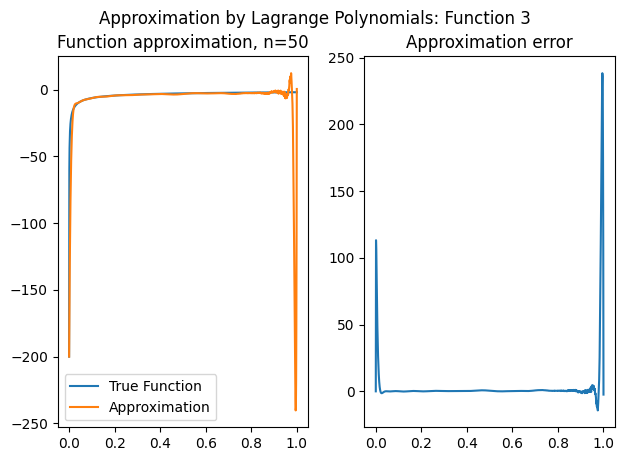

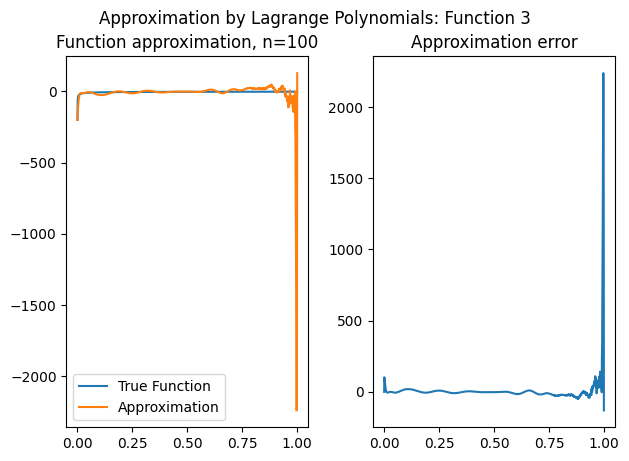

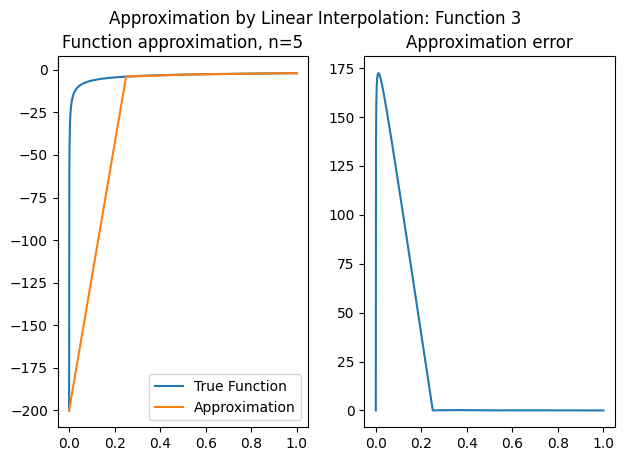

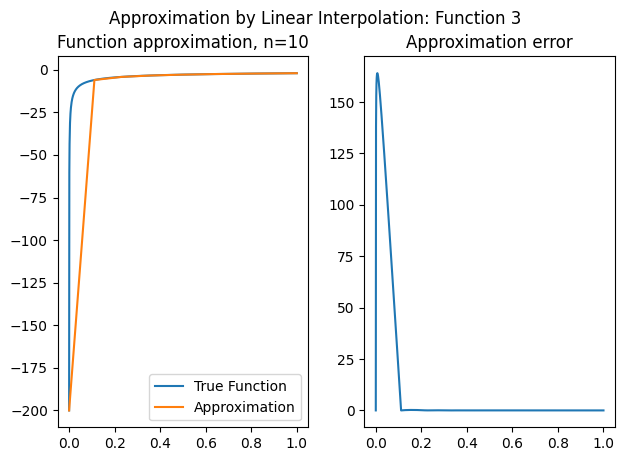

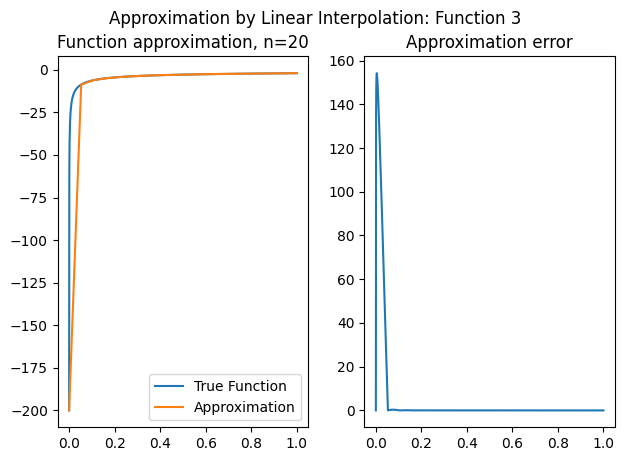

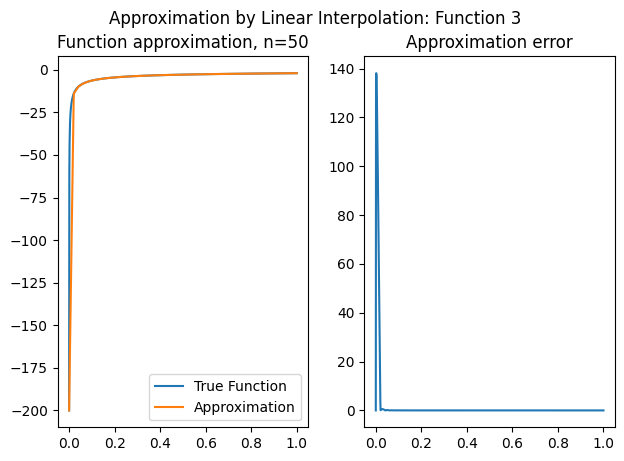

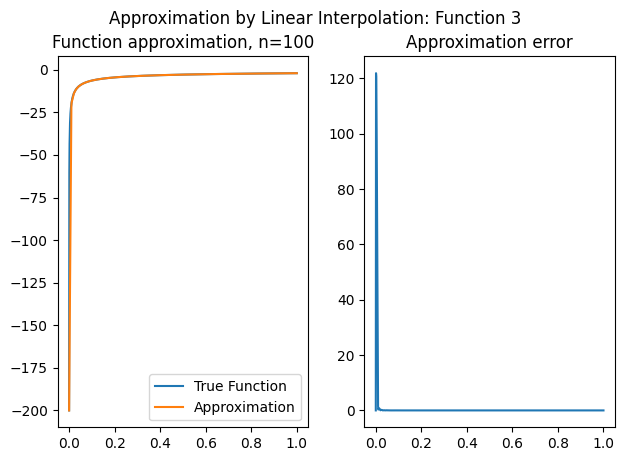

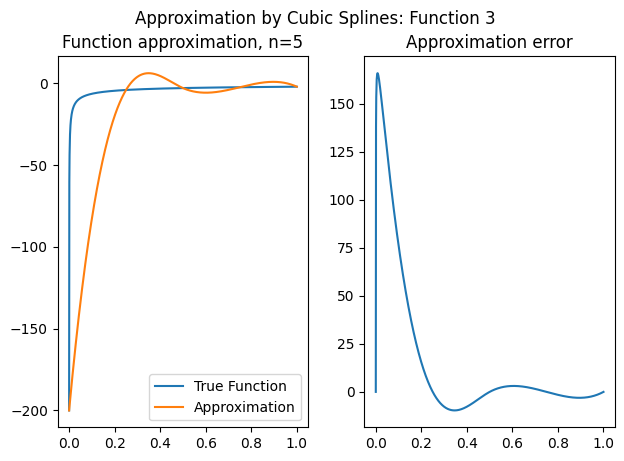

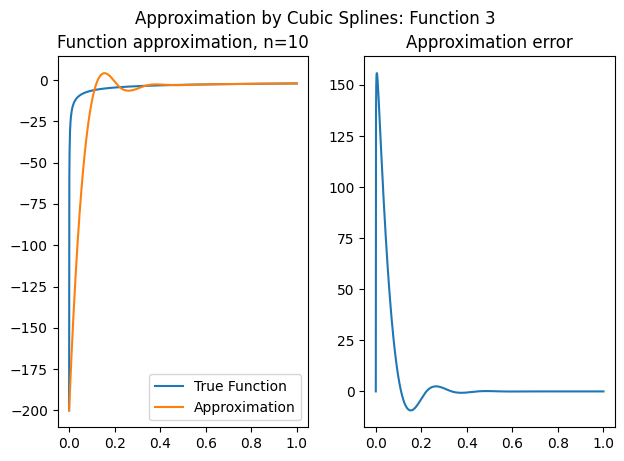

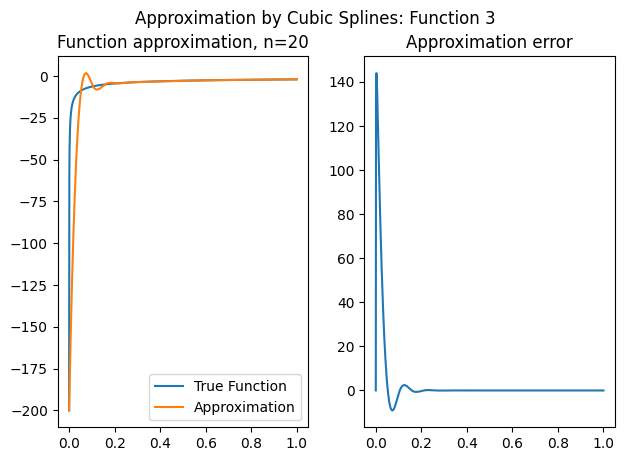

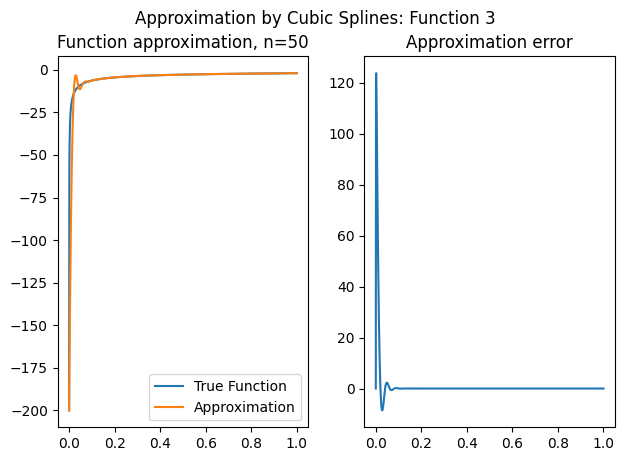

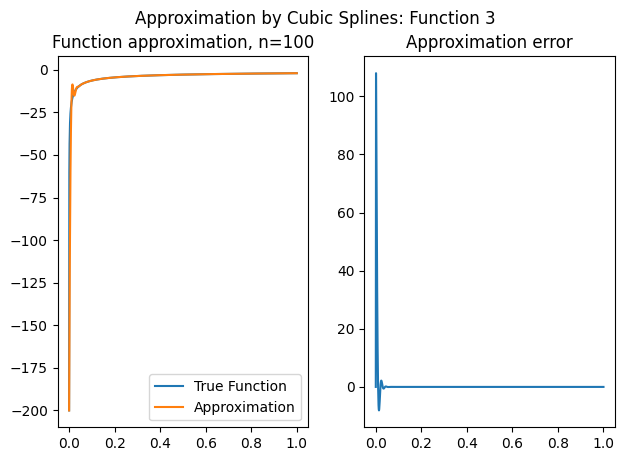

In [10]:
## FUNCTION 3 ## 
    
# Define interval
x_min = 0.0001    # We set x_min slightly higher than 0 to avoid math errors. The closer x_min is to zero, the higher the errors are
x_max = 1
# Define grid size
x_grid = np.linspace(x_min,x_max,1000)
# Select function
fun = f3
# Evaluate true function
true = fun(x_grid)


for method in methods:
    for n in N:
        predic = method(fun,n,x_min,x_max,1000)

        fig, ax = plt.subplots(1,2)
        fig.suptitle(f"Approximation by {methods[method]}: Function 3", y=0.95)
        
        ax[0].set_title(f"Function approximation, n={n}")
        ax[0].plot(x_grid, true, label="True Function")
        ax[0].plot(x_grid, predic, label="Approximation")
        ax[0].legend()

        ax[1].set_title("Approximation error")
        ax[1].plot(x_grid,true - predic)

        plt.tight_layout()
        plt.show()
        print()

#### Function 4

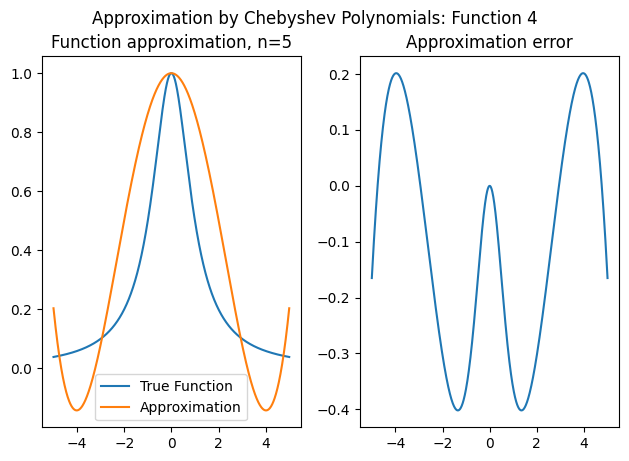

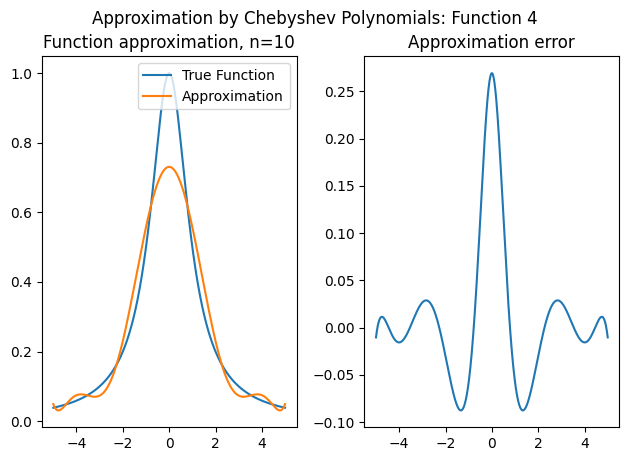

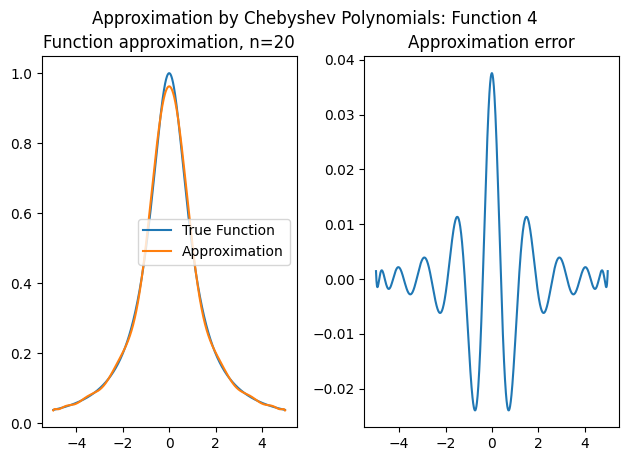

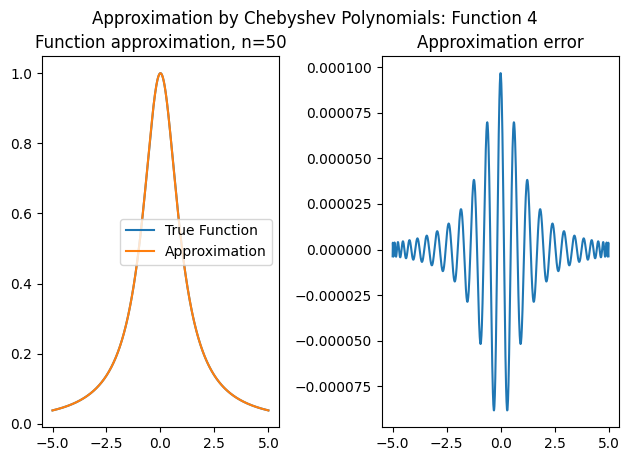

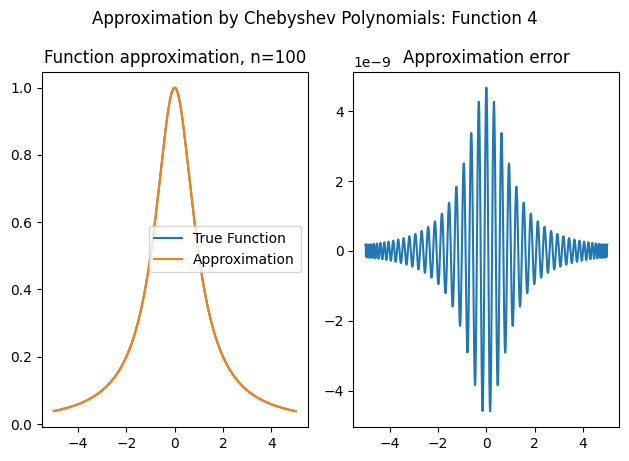

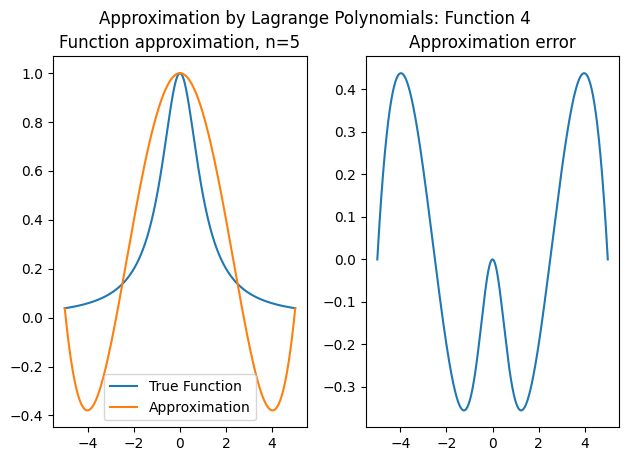

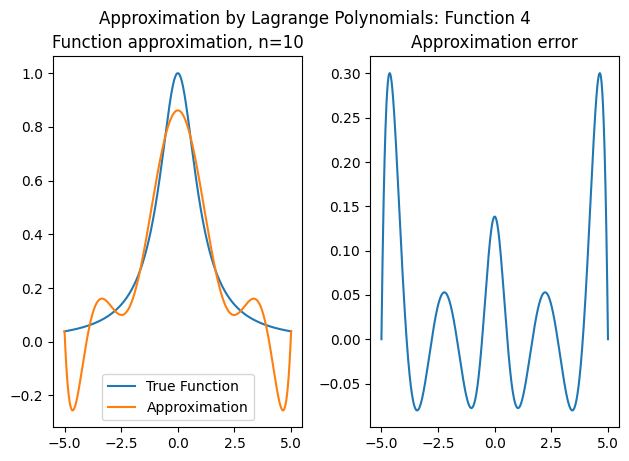

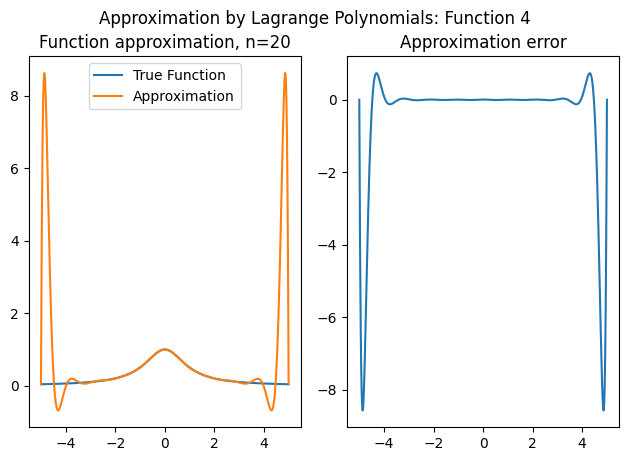

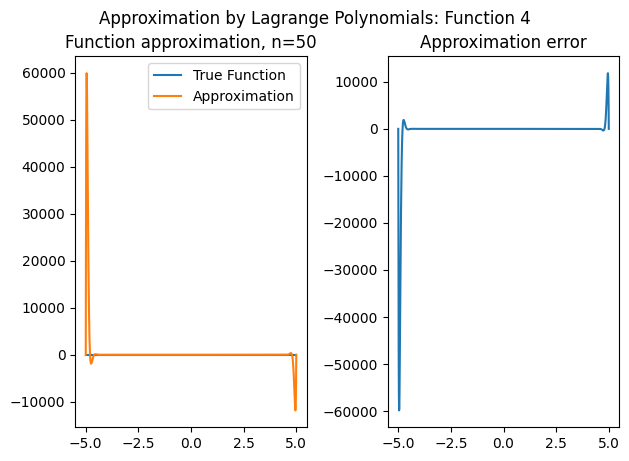

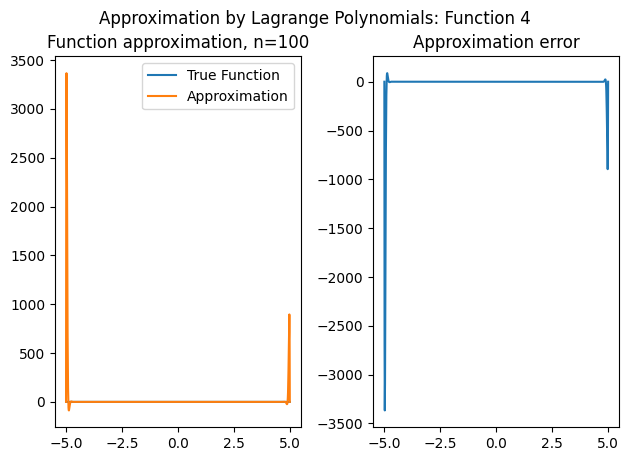

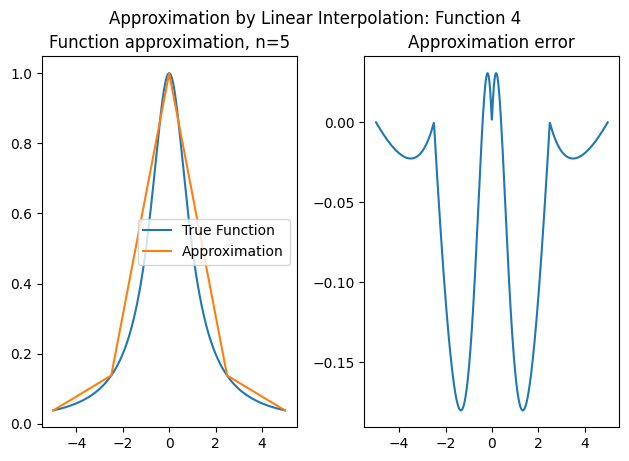

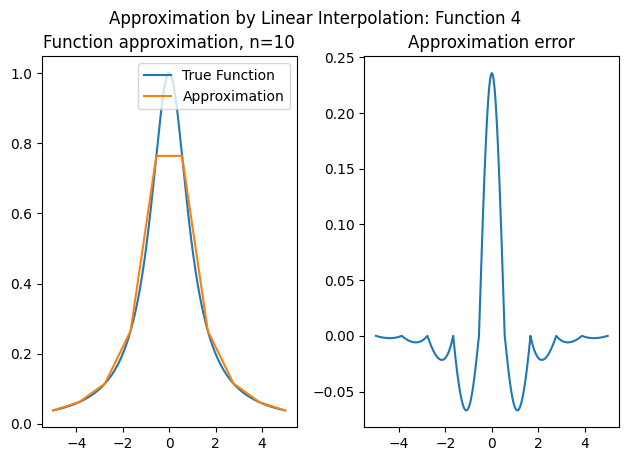

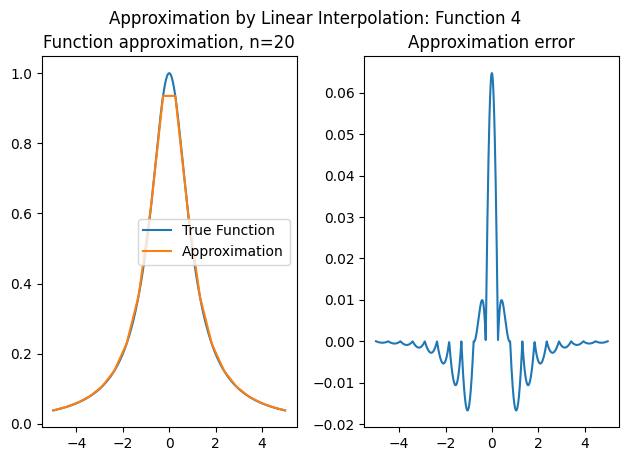

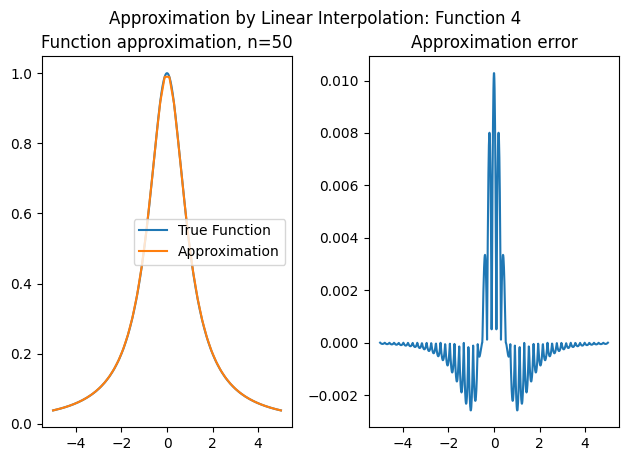

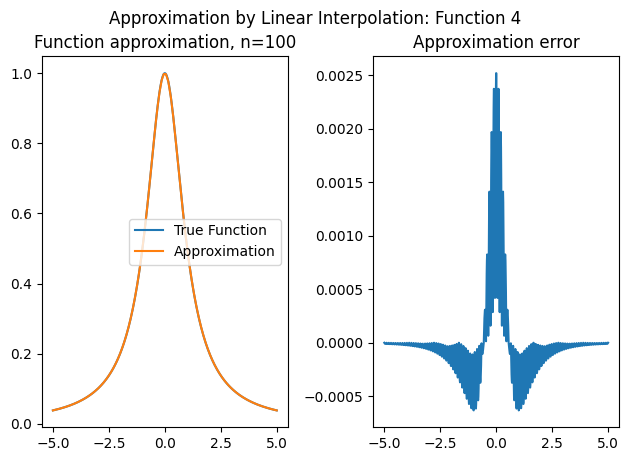

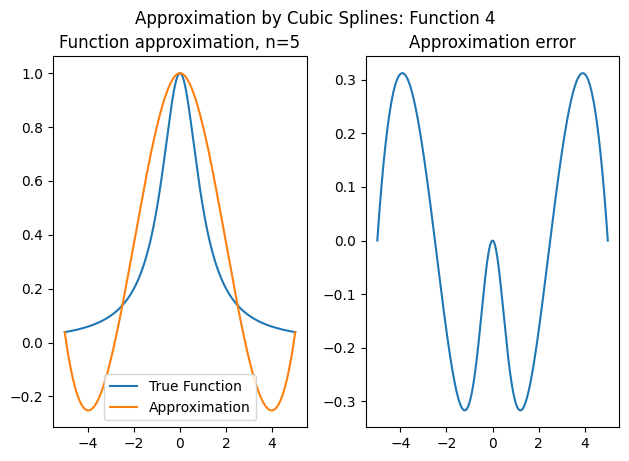

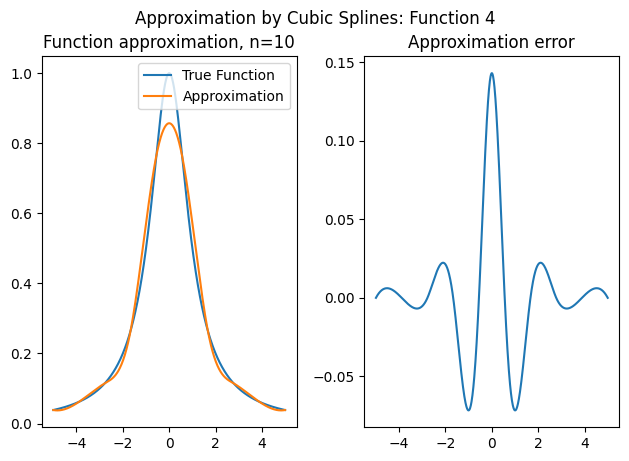

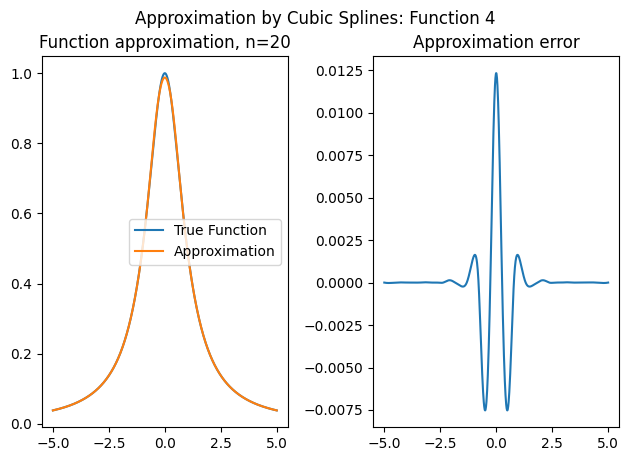

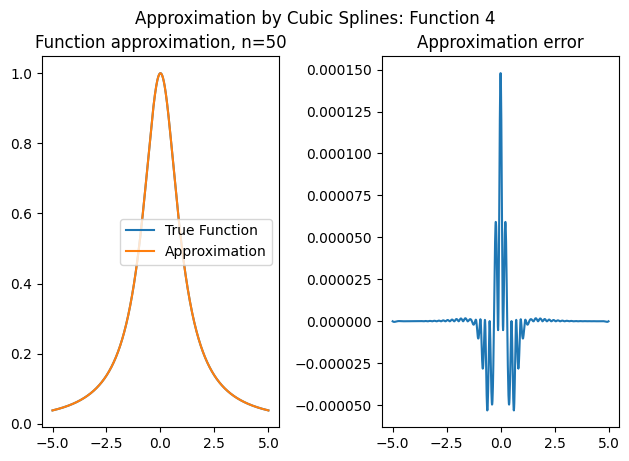

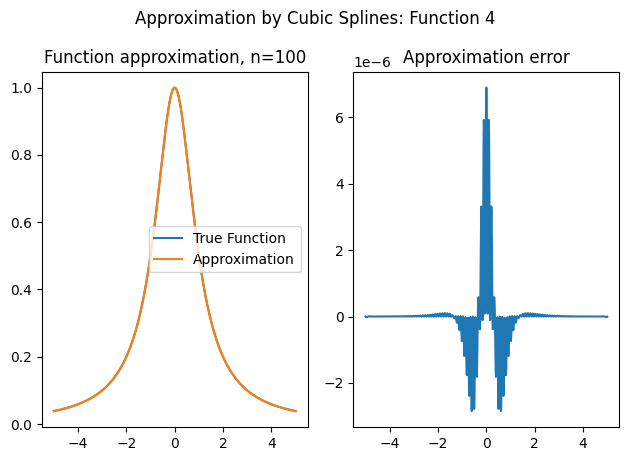

In [11]:
## FUNCTION 4 ## 
   
# Define interval
x_min = -5
x_max = 5
# Define grid size
x_grid = np.linspace(x_min,x_max,1000)
# Select function
fun = f4
# Evaluate true function
true = fun(x_grid)


for method in methods:
    for n in N:
        predic = method(fun,n,x_min,x_max,1000)

        fig, ax = plt.subplots(1,2)
        fig.suptitle(f"Approximation by {methods[method]}: Function 4", y=0.95)
        
        ax[0].set_title(f"Function approximation, n={n}")
        ax[0].plot(x_grid, true, label="True Function")
        ax[0].plot(x_grid, predic, label="Approximation")
        ax[0].legend()

        ax[1].set_title("Approximation error")
        ax[1].plot(x_grid,true - predic)

        plt.tight_layout()
        plt.show()
        print()

#### Interpretation

Some approximations are better than others depending on the nature of the function that we are approximating.

It is safe to say that in almost all cases, Approximation by Chebyshev Polynomials is better than its Lagrange counterpart. This is due to its uneven selection of nodes.

However, some functions are arguably better approximated with approximations like linear interpolation. Function 2 - which features straight, jagged lines and has a discontinuous first derivative - requires higher n for Chebyshev and Cubic Spline approximations to converge, while linear interpolation converges relatively quicker. 

Cubic Splines performs well when Chebyshev performs well, and worse when Chebyshev performs worse. However, between the two, Chebyshev tends to perform better. 

### Part b

In [12]:
## Set up
# n = 5, 6, 7, ..., 1000
n_grid = np.arange(5,1001,10)    # We use a stepsize of 10 because it becomes too computationally expensive otherwise

In [13]:
def approx_error_squared(fun, x_min, x_max, n, method):
    # Define grid size
    x_grid = np.linspace(x_min,x_max,1000)
    # Evaluate true function
    true = fun(x_grid)
    # Evaluate approximation
    predic = method(fun,n,x_min,x_max,1000)

    # Compute approximation error
    element_wise_error = true - predic

    # Find the norm
    error = np.linalg.norm(element_wise_error)

    # Square approximation error
    return error**2

#### Function 1

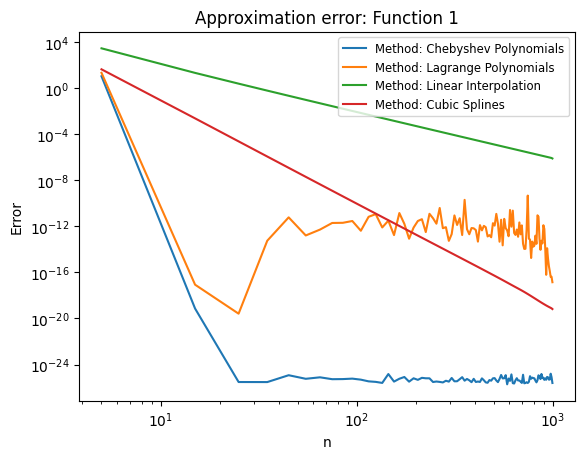

In [14]:
## FUNCTION 1 ## 

# Define interval
x_min = -1
x_max = 1
# Select function
fun = f1

plt.figure()
for method in methods:
    approx_errors = []
    for n in n_grid:
        error_n = approx_error_squared(fun, x_min, x_max, n, method)
        approx_errors.append(error_n)
    plt.plot(n_grid, approx_errors, label=f"Method: {methods[method]}")

plt.legend(loc="upper right", fontsize="small")
plt.yscale('log')
plt.xscale('log')

plt.ylabel("Error")
plt.xlabel("n")
plt.title("Approximation error: Function 1")

plt.show()
    

#### Function 2

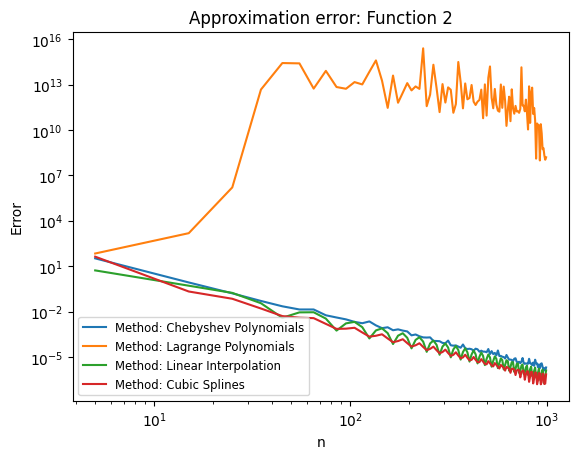

In [15]:
## FUNCTION 2 ## 

# Define interval
x_min = -1
x_max = 1
# Select function
fun = f2

plt.figure()
for method in methods:
    approx_errors = []
    for n in n_grid:
        error_n = approx_error_squared(fun, x_min, x_max, n, method)
        approx_errors.append(error_n)
    plt.plot(n_grid, approx_errors, label=f"Method: {methods[method]}")
plt.legend(loc="lower left", fontsize="small")
plt.yscale('log')
plt.xscale('log')

plt.ylabel("Error")
plt.xlabel("n")
plt.title("Approximation error: Function 2")

plt.show()

#### Function 3

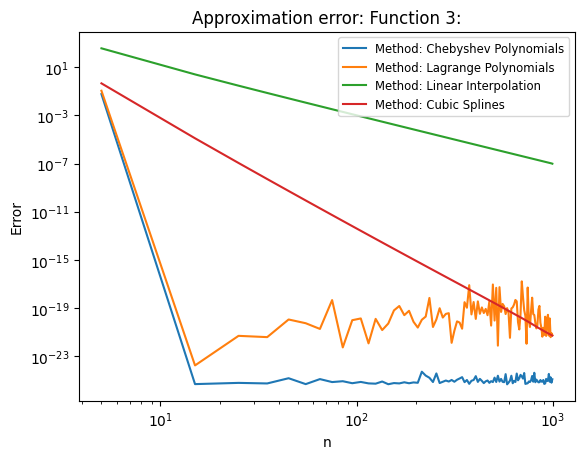

In [16]:
## FUNCTION 3 ## 

# Define interval
x_min = 0.0001
x_max = 1
# Select function
fun = f1

plt.figure()
for method in methods:
    approx_errors = []
    for n in n_grid:
        error_n = approx_error_squared(fun, x_min, x_max, n, method)
        approx_errors.append(error_n)
    plt.plot(n_grid, approx_errors, label=f"Method: {methods[method]}")
plt.legend(loc="upper right", fontsize="small")
plt.yscale('log')
plt.xscale('log')

plt.ylabel("Error")
plt.xlabel("n")
plt.title("Approximation error: Function 3:")

plt.show()

#### Function 4

In [ ]:
## FUNCTION 4 ## 

# Define interval
x_min = -5
x_max = 5
# Select function
fun = f1

plt.figure()
for method in methods:
    approx_errors = []
    for n in n_grid:
        error_n = approx_error_squared(fun, x_min, x_max, n, method)
        approx_errors.append(error_n)
    plt.plot(n_grid, approx_errors, label=f"Method: {methods[method]}")
plt.legend(loc="upper right", fontsize="small")
plt.yscale('log')
plt.xscale('log')

plt.ylabel("Error")
plt.xlabel("n")
plt.title("Approximation error: Function 4")

plt.show()

#### Interpretation

The slop of the error approximations show the rate of convergence. A steep negative slop indicates fast convergence as the error approaches zero.
As expected linear and cubic interpolation have a steady rate of convergence  in their approximation error. As we increase the number of estimation points, however these two methods are not the most effective 
Chebyshev and Lagrange interpolation have stronger convergence on average, however also risk to fail. For example, Lagrange interpolation fails to be more efficient than Cubic Splines for f1 and f3, while Lagrange Interpolation fully fails on F2 as the function is unbound.

## Problem 2

### Functions

In [11]:
def v(k, a, b):
    return a + b*np.log(k)


def obj_function_a(x, params, k):
    """Using constraint c + k' = k^α:
    Let k' = x
        - c = k^α - x
        - k' = x
    """
    a, b, alpha, beta = params
    return -(np.log(k**alpha - x) + beta*v(x, a, b))    # Return negative so we can maximise using optimize.minimize

### Part a

In [12]:
# Part a ----

def maximise_function_a(params, k_choice):
    k = k_choice

    # Setting the bounds for k (or x) - This ensures the second constraint is satisfied
    bnds = [(0, k**alpha)]

    # minimize the negative of the objective function
    res = minimize(obj_function_a, x0=0.5, args=(params, k), bounds=bnds, method='L-BFGS-B')

    fun = -res.fun     # Multiply by -1 to get the maximum again
    k_1_opt = res.x[0] # [0] to extract value from the array
    c_opt = k**alpha - k_1_opt
    
    return fun, k_1_opt, c_opt

In [13]:
# Defining paramaters
a = -10
b = 0.5
alpha = 0.5
beta = 0.9

params = [a, b, alpha, beta]

K = [0.5, 1, 5, 9]
for k in K:
    solution = maximise_function_a(params, k_choice=k)[0]
    print(f"Maximum when k = {k}: {solution:.5f}")

Maximum when k = 0.5: -10.88644
Maximum when k = 1: -10.00506
Maximum when k = 5: -8.73125
Maximum when k = 9: -8.30511


#### Visualisation:

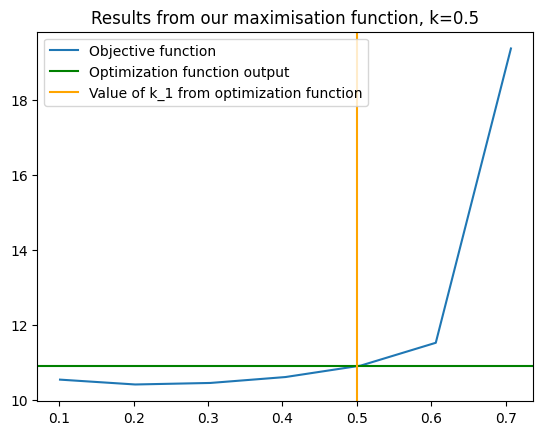

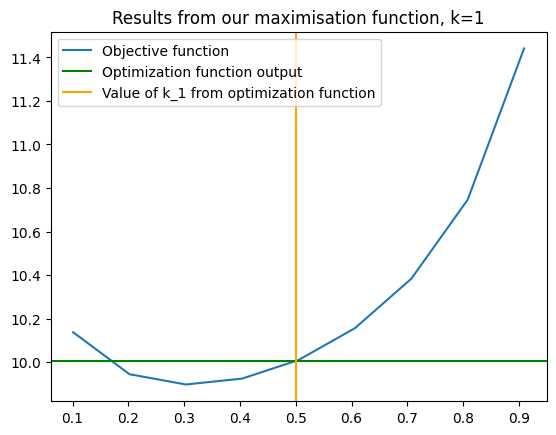

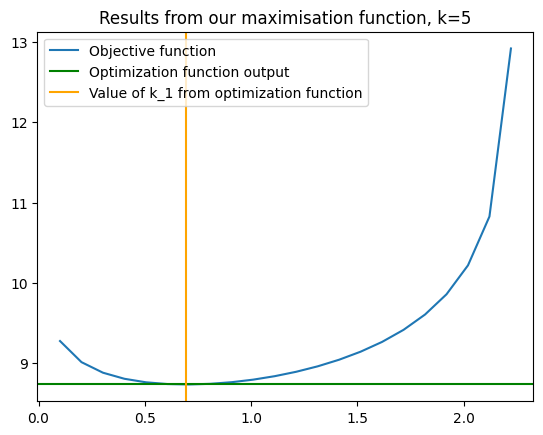

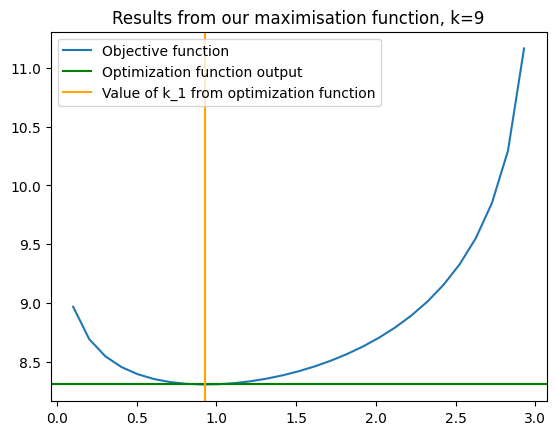

In [21]:
## Visualising the results
k_1_grid = np.linspace(0,10,100)
for k in K:
    plt.figure()
    plt.title(f"Results from our maximisation function, k={k}")
    obj_fun_output = []
    for k_1 in k_1_grid:
        obj_fun_output.append(obj_function_a(k_1,params,k))
    plt.plot(k_1_grid, obj_fun_output, label="Objective function")
    plt.axhline(-maximise_function_a(params,k)[0], color="green", label="Optimization function output")
    plt.axvline(maximise_function_a(params,k)[1], color="orange", label="Value of k_1 from optimization function")
    
    plt.legend()
    plt.show()

We see that, for lower values of k, our maximisation function is not so accurate, but gets more accurate as k increases.

### Part b

#### Approximating v for n = 5, 20, 100

In [22]:
## Set up:
# Define node sizes
N = [5, 20, 100]
# Define interval
x_min = 1e-6
x_max = 10
# Define grid size
x_grid = np.linspace(x_min,x_max,1000)
# Create iterable for approximation methods
methods = {approx_linear:"Linear Interpolation", approx_cubic:"Cubic Splines", approx_cheby:"Chebyshev Polynomials"}
# Evaluate true function
true = v(x_grid, a, b)

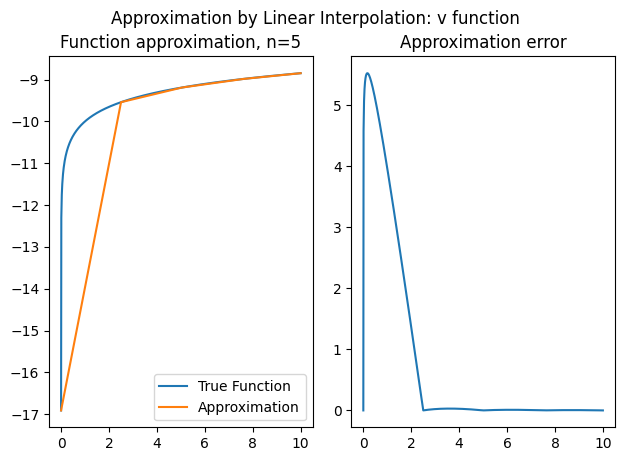

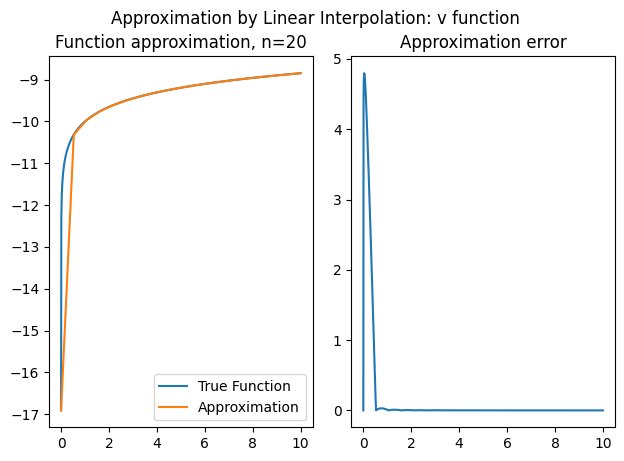

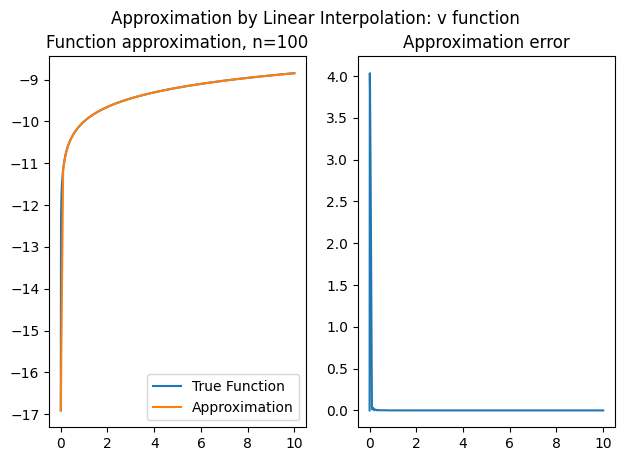

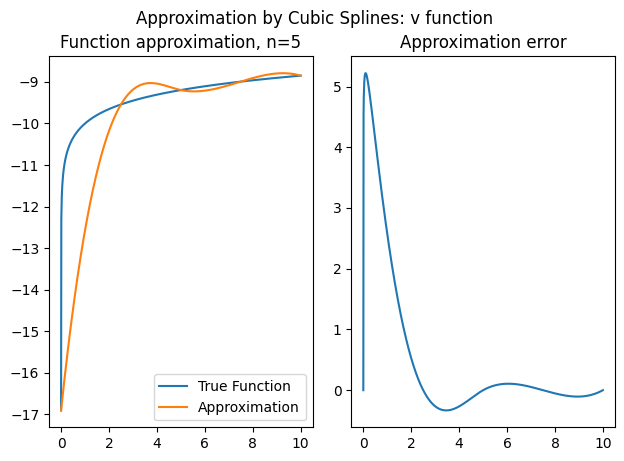

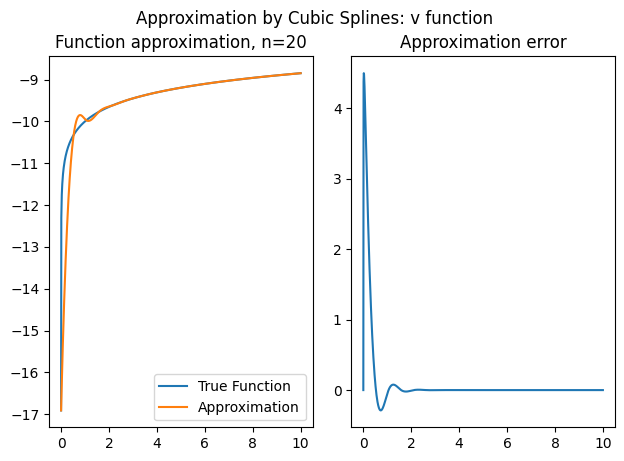

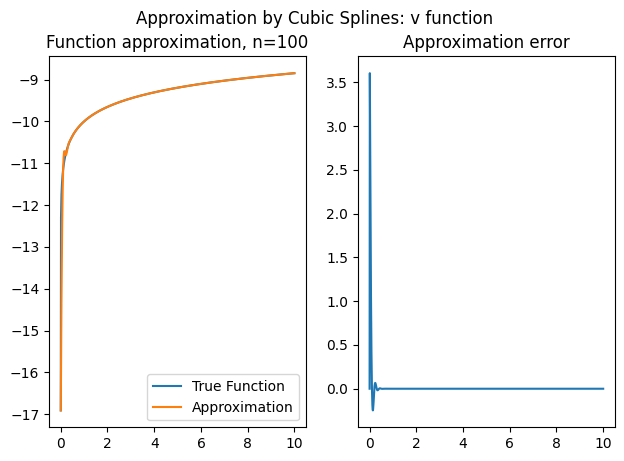

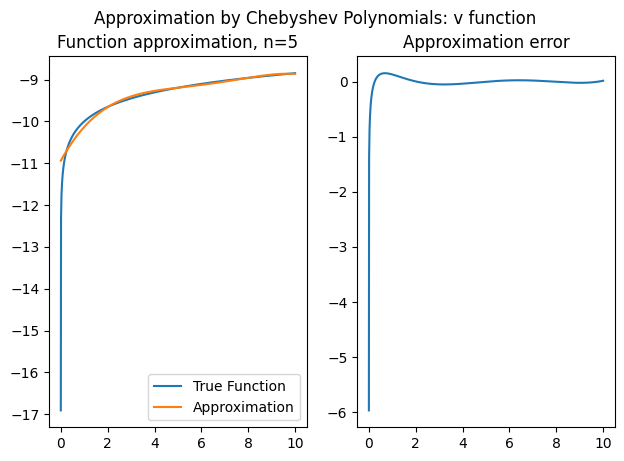

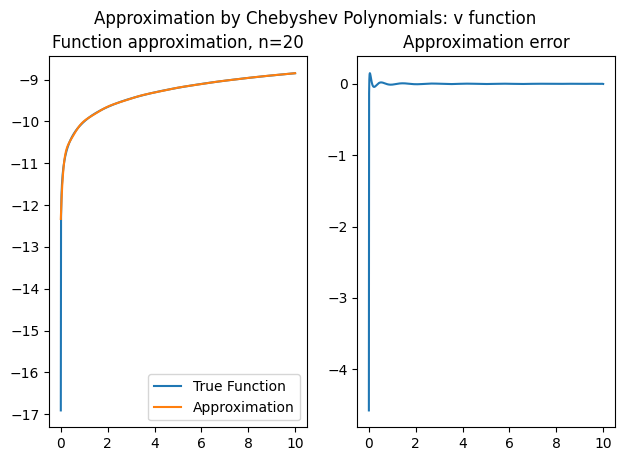

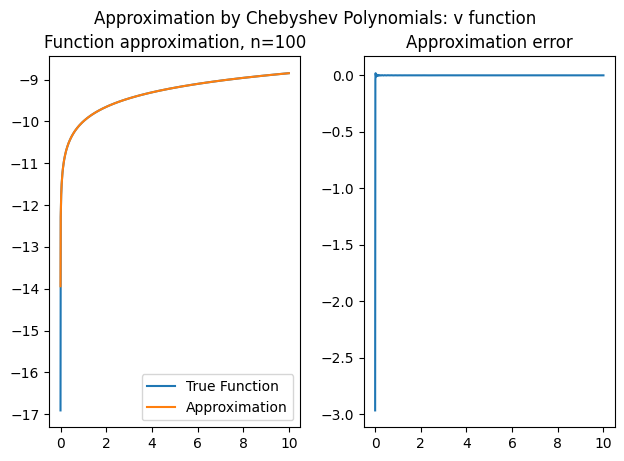

In [23]:
for method in methods:
    for n in N:
        predic = method(v,n,x_min,x_max,1000,[a,b])

        fig, ax = plt.subplots(1,2)
        fig.suptitle(f"Approximation by {methods[method]}: v function", y=0.95)
        
        ax[0].set_title(f"Function approximation, n={n}")
        ax[0].plot(x_grid, true, label="True Function")
        ax[0].plot(x_grid, predic, label="Approximation")
        ax[0].legend()        

        ax[1].set_title("Approximation error")
        ax[1].plot(x_grid,true - predic)

        plt.tight_layout()
        plt.show()
        print()

#### Re-solving maximisation for v_hat


In order to use scipy.optimize.minimize, we need to pass in an objective function that outputs one value.
This means that we need to make a function that approximates v for one value, rather than outputting a grid of values:

In [24]:
# Define approximation of v:
def v_approx(x, n, method, a, b): # Method depends on the type of approximation we want to use
    "Returns the prediction of v at a single point, x, using the desired method"
    x_grid = np.linspace(x_min,x_max,1000)
    predic = method(v,n,x_min,x_max,1000,[a,b])
    return np.interp(x, x_grid, predic) # We interpolate the grid of predicted values with a single value, x.

In [25]:
# Define new objective function with approximation
def obj_function_b(x, n, params, k, method):   
    a, b, alpha, beta = params
    return -(np.log(k**alpha - x) + beta*v_approx(x, n, method, a, b))    # Return negative so we can maximise using optimize.minimize

In [26]:
# Define new maximise function
def maximise_function_b(params, n, k_choice, method):
    k = k_choice

    # Setting the bounds for k (or x) - This ensures the second constraint is satisfied
    bnds = [(0, k**alpha)]

    # minimize the negative of the objective function
    res = minimize(obj_function_b, x0=0.5, args=(n, params, k, method), bounds=bnds, method='L-BFGS-B')

    fun = -res.fun     # Multiply by -1 to get the maximum again
    k_1_opt = res.x[0]
    c_opt = k**alpha - k_1_opt
    return fun, k_1_opt, c_opt


In [34]:
K = [0.5, 1, 5, 9]
print("The output format is as follows:")
print("(Maximisation output, Optimal k_1, Optimal c)")
print()

for method in methods:
    print(f"{methods[method]}:")
    for k in K:
        print(f"k = {k}:")
        for n in N:
            print(f"n = {n}: {maximise_function_b(params, n, k, method)}")
            # maximise_function_a(params, k)
        print()
    print()

The output format is as follows:
(Maximisation output, Optimal k_1, Optimal c)

Linear Interpolation:
k = 0.5:
n = 5: (-15.317140193143057, 0.32999369499140474, 0.37711308619514283)
n = 20: (-11.159772222278239, 0.5, 0.20710678118654757)
n = 100: (-10.404303658563881, 0.2102105503150856, 0.49689623087146195)

k = 1:
n = 5: (-14.584267307696738, 0.5, 0.5)
n = 20: (-10.278398635258696, 0.5, 0.5)
n = 100: (-9.899300406269386, 0.30030136985572903, 0.6996986301442709)

k = 5:
n = 5: (-13.33949735411931, 0.5, 1.7360679774997898)
n = 20: (-9.033628681681268, 0.5, 1.7360679774997898)
n = 100: (-8.731581174993385, 0.7054640806110497, 1.53060389688874)

k = 9:
n = 5: (-9.424054658602733, 2.343007419055345, 0.6569925809446548)
n = 20: (-8.668960722824597, 0.5, 2.5)
n = 100: (-8.305307164025697, 0.9109118227450793, 2.089088177254921)


Cubic Splines:
k = 0.5:
n = 5: (-14.570065573634505, 0.4553798402584057, 0.25172694092814185)
n = 20: (-10.96555719366782, 0.48972899589439906, 0.21737778529214852)

#### Visualizing the data

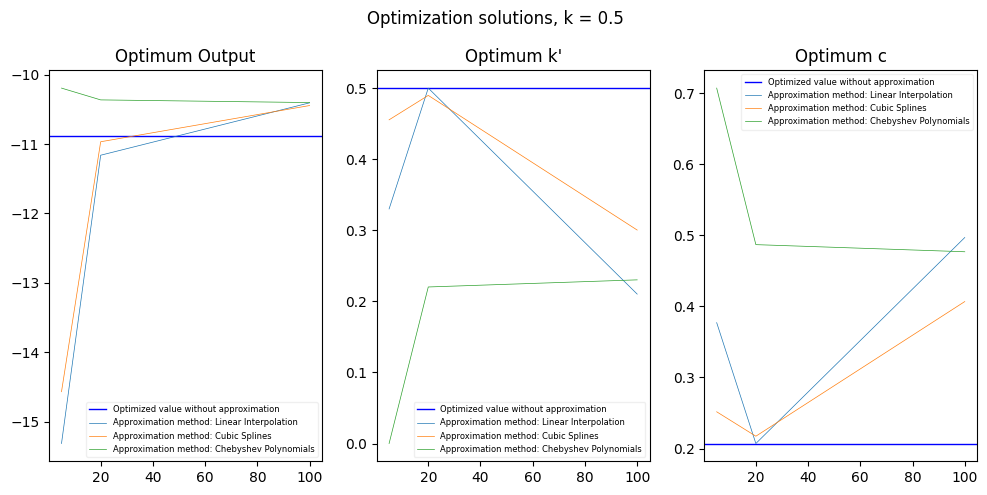

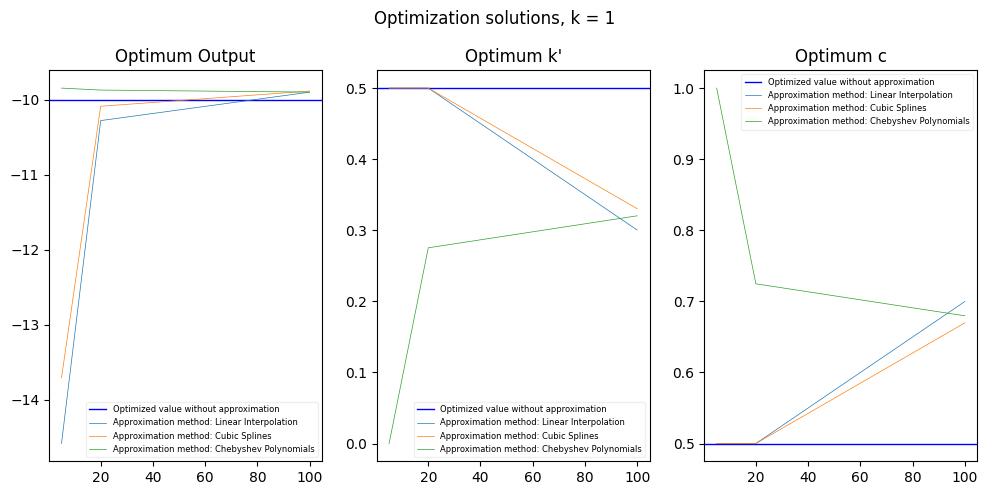

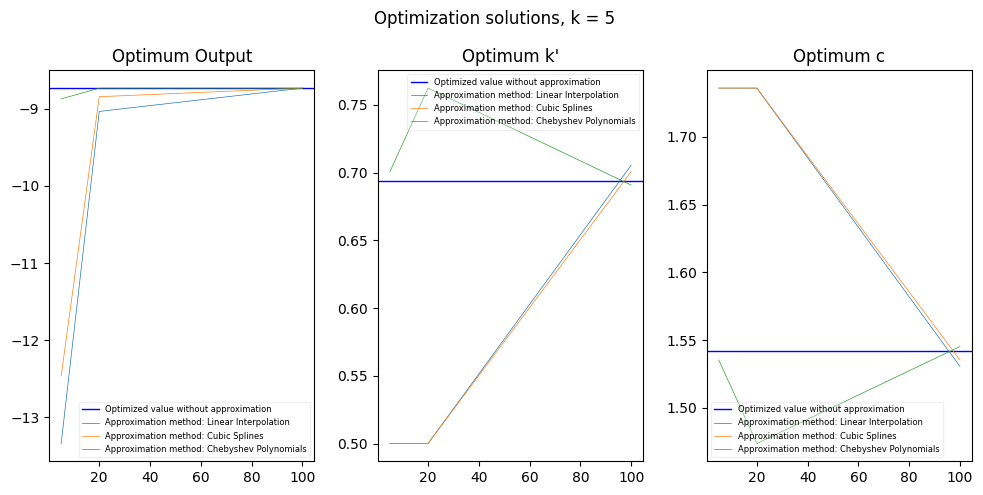

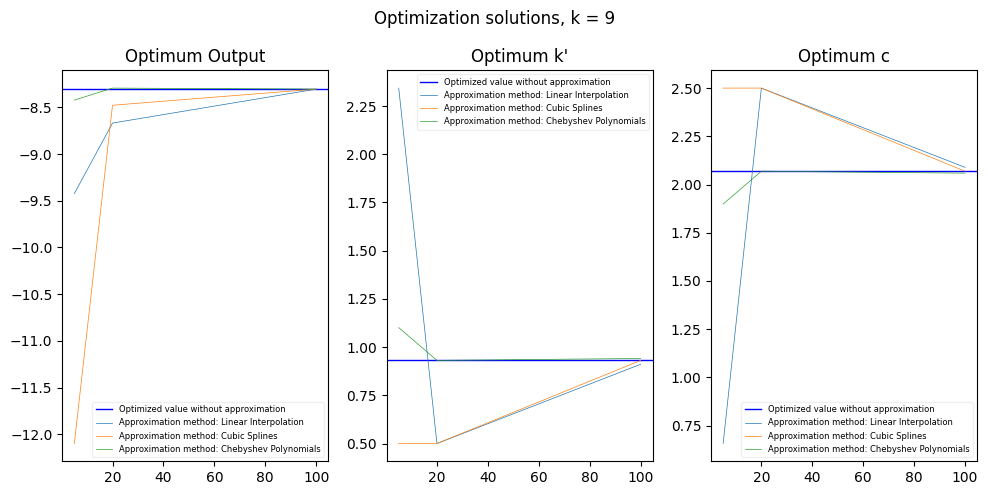

In [57]:
for k in K:
    fig, ax = plt.subplots(1,3, figsize=(10,5))
    for i in range(3):
        ax[i].axhline(maximise_function_a(params,k)[i], label="Optimized value without approximation", color="blue", linewidth=1)
        for method in methods:
            predic = []
            for n in N: # Construct approximation grid for each method
                predic.append(maximise_function_b(params, n, k, method)[i])
            ax[i].plot(N, predic, label=f"Approximation method: {methods[method]}", linewidth=0.5)   # Plot approximation against n
        ax[i].legend(fontsize=6,fancybox=True, framealpha=0.3)    # Make legend small, transparent

    ax[0].set_title("Optimum Output")
    ax[1].set_title("Optimum k'")
    ax[2].set_title("Optimum c")
    fig.suptitle(f"Optimization solutions, k = {k}")

    plt.tight_layout()
    plt.show()

When k is low (0.5,1), the optimizations via our approximations don't converge to the non-approximated optimizations. This result directly follows from that of part a. We think this is because having a low k means that c (and therefore k') can only take a smaller range of values due to the second constraint.

However, when k is sufficiently high, our approximations look like they do converge. We can see from the graphs that Cubic Splines and Linear Interpolation follow somewhat similar paths as they converge, while the Chebyshev Polynomials are more unique in their paths. For low values of n, Chebyshev tends to perform better, and sometimes converges with n as low as 20. This never happens for Linear Interpolation or Cubic Splines.

These observations would suggest that, with this objective function, Chebyshev Polynomials are the best method in approximating and maximising the objective function.

#### How similar are the optimized values?


The difference between the true optimization value and the predicted value is significant. More specifically, it is seen that the output of the maximization function in part a produces smaller values when compared to the output of the maximization function in part b. Furthermore, by trying different k values, the maximization function in part b gives results that have a bigger gap between the values for the maximization output. To be clearer, the maximum values for different k values (.5, 1, 5, 9) varied from -10 to -8 in part a, while the output of part b -using the same k values- varied from -15 to -7.


#### How close are the implied optimal choices of c and k'?


As it can be seen from the graphs, when k = .5 and k = 1, the implied optimal choices of c ank k' get close to the true optimum. However, the bigger n gets, the difference between the implied optimal choices of and k' get bigger. Contrarily, for k = 5 and k = 9, the implied optimal choices of approximation methods get closer to the true optimized value without approximation. 

#### What do you take away from this?

All in all, all of the results from the approximation methods get closer to the findings of the true function when n values are larger, meaning that the approximation errors get smaller with bigger n values. Furthermore, with linear interpolation, the maximization output gets smaller with bigger k and within the same k values, bigger n values mean smaller maximization output. However, this relationship can not be said for cubic splines and chebyshev polynomials. It could be argued that when cubic splines and chebyshev polynomials are utilised, the effects of varying k and n values on optimal k_1 and optimal c values vary drastically. More specifically, the results of our code argue that the k and n values do not have a causal relationship with optimal k' and c values.


#### Part C

In [14]:
k_val = np.linspace(0.1,10,100) #create grid space with 100 points between 0.1 to 10
c_val = alpha * k_val ** alpha * np.random.uniform(0, 1, size=100) #find values of c
k_prime_val = k_val ** alpha - c_val #find values of k'

In [16]:
# Calculate the values of v(k)= a+b*log(k_val) and v(k')=maxlog(c)+beta*v(k′) for each k and k' value
v_k = a + b * np.log(k_val)
v_k_prime= np.zeros_like(k_prime_val)


for i in range(100):
    v_k_prime[i] = np.max(np.log(c_val[:i+1]) + beta * v_k[:i+1])

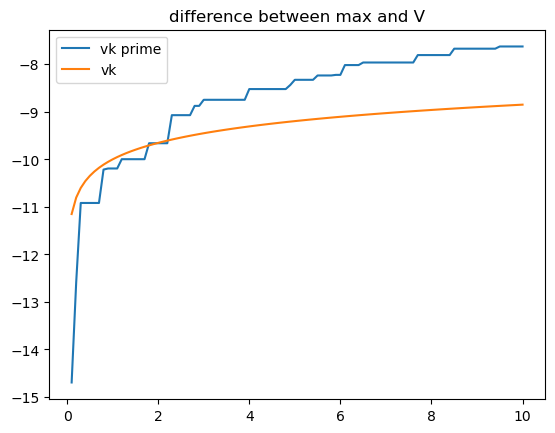

In [28]:
# plot graph to show differences
plt.plot(k_val, v_k_prime, label='vk prime')
plt.plot(k_val, v_k, label='vk')
plt.title('difference between max and V')
plt.legend()

#### Part D

In [ ]:
# define initial values
a0=-10
b0=0.5

#create a grid with 5 points, between 0.1 to 10
grid=np.linspace(0.1, 10, 5)

# we were not able to produce a code to solve this problem. However, we tried to create a list of trublets
# and loop them into the funciton created in part a to find optimal values of k. 